# Introduccion

**Todo ejercicio debe tener un análisis fundamentado en la teoría vista en la materia, dicho análisis sera parte del informe a entregar en pdf**

- <span style="color:blue">*Se recomienda hacer uso de las herramientas vistas en los demos de la materia.*</span>

- <span style="color:red">**Usar lo hecho en el práctico Análisis Exploratorio y Curación de Datos**.</span>


**Objetivos:** 
- Implementar modelos de clustering, variando el número de clusters.
- Usar embeddings:  PCA, correlación y t-distributed stochastic neighbor.

Implementar dos modelos de clustering con y sin embeddings uno de ellos k-means.

Realizar un análisis de lo obtenido. 
- Es muy recomendable integrar indicadores de mala calidad como por ejemplo "hay un cluster muy grande y el resto son muy chicos", lo cual indica que en el espacio no se distinguen bien grupos separados y hay que usar otro espacio 
- Evaluar con Silohuette y pureza con algunos datos etiquetados.

**NOTA:** Es de suma importancia usar el conocimiento del experto en este práctico. 

# Analisis de datos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd
 
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)


In [3]:
data = pd.read_csv("dataset/galaxias_1.csv")
data.head()

,objID,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain
0,"1,23765119242489E+018",116.519097,39.886407,17.76235,16.72601,16.33972,16.06614,15.90478,8.393773,0.041521,-1.422625,0,1,0
1,"1,23765149575578E+018",116.451900,41.421270,18.12179,16.26214,15.39272,14.97515,14.65105,9.674847,0.040211,-2.729061,0,0,1
2,"1,23767370611537E+018",115.946713,41.918877,18.57293,17.42053,17.01788,16.75617,16.70899,11.277470,0.024386,-1.555044,0,0,1
3,"1,2376737066523E+018",116.051943,42.287231,21.37438,19.77335,19.55791,20.35405,18.88184,1.539542,0.039137,-1.816479,0,0,1
4,"1,23765127349266E+018",117.287392,43.434782,19.18845,17.99682,17.51119,17.26241,17.09056,12.471450,0.042591,-1.677259,0,0,1


In [4]:
data.describe()

,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain
count,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000
mean,181.086338,24.723737,184.319135,171.045909,160.125000,163.614406,139.806936,57.032318,0.036092,-3.462711,0.089651,0.326225,0.584124
std,61.177151,18.853785,1737.511731,1612.598539,1525.504087,1530.181510,1402.492646,923.367743,0.008435,76.781199,0.285682,0.468833,0.492875
min,0.008745,-11.202394,-9999.000000,-9999.000000,11.524090,11.220580,-9999.000000,0.842248,0.020001,-2902.000000,0.000000,0.000000,0.000000
25%,150.287271,9.115292,17.733585,16.260870,15.572525,15.210220,14.919152,6.120165,0.029082,-2.511168,0.000000,0.000000,0.000000
50%,183.219954,23.111344,18.453880,17.094630,16.506160,16.188085,15.947850,8.365595,0.036321,-1.995331,0.000000,0.000000,1.000000
75%,222.722975,38.982500,19.047078,17.734885,17.227810,16.947265,16.753538,11.368645,0.043620,-1.607067,0.000000,1.000000,1.000000
max,359.965567,70.133213,25756.000000,20542.000000,19138.000000,23871.000000,20823.000000,78255.000000,0.050000,10015.860000,1.000000,1.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92102 entries, 0 to 92101
Data columns (total 14 columns):
objID         92102 non-null object
ra            92102 non-null float64
dec           92102 non-null float64
modelMag_u    92102 non-null float64
modelMag_g    92102 non-null float64
modelMag_r    92102 non-null float64
modelMag_i    92102 non-null float64
modelMag_z    92102 non-null float64
petroR90_r    92102 non-null float64
z             92102 non-null float64
Color         92102 non-null float64
elliptical    92102 non-null int64
spiral        92102 non-null int64
uncertain     92102 non-null int64
dtypes: float64(10), int64(3), object(1)
memory usage: 9.8+ MB


Seteo "objID" como index

In [6]:
data.set_index("objID", inplace=True)

In [7]:
data.head()

,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain
objID,,,,,,,,,,,,,
"1,23765119242489E+018",116.519097,39.886407,17.76235,16.72601,16.33972,16.06614,15.90478,8.393773,0.041521,-1.422625,0,1,0
"1,23765149575578E+018",116.451900,41.421270,18.12179,16.26214,15.39272,14.97515,14.65105,9.674847,0.040211,-2.729061,0,0,1
"1,23767370611537E+018",115.946713,41.918877,18.57293,17.42053,17.01788,16.75617,16.70899,11.277470,0.024386,-1.555044,0,0,1
"1,2376737066523E+018",116.051943,42.287231,21.37438,19.77335,19.55791,20.35405,18.88184,1.539542,0.039137,-1.816479,0,0,1
"1,23765127349266E+018",117.287392,43.434782,19.18845,17.99682,17.51119,17.26241,17.09056,12.471450,0.042591,-1.677259,0,0,1


Veo que tipos de datos tengo

In [8]:
data.dtypes

ra            float64
dec           float64
modelMag_u    float64
modelMag_g    float64
modelMag_r    float64
modelMag_i    float64
modelMag_z    float64
petroR90_r    float64
z             float64
Color         float64
elliptical      int64
spiral          int64
uncertain       int64
dtype: object

## Veo si tengo valores duplicados

In [9]:
data[data.astype(str).duplicated()].shape

(61, 13)

In [10]:
data[data.index.astype(str).duplicated()].shape[0] / data.shape[0]

0.37372695489783064

In [11]:
data[data.index.astype(str).duplicated()].shape[0]

34421

Veo que hay muchos indices repetidos, pero no así tantas filas completas.
Una explicación posible a esto es que las galaxias estan identificadas por el indice, pero hay observacion de una misma galaxia en diferentes momentos temporales, por lo que no esta mal tener indices repetidos.

Sin embargo, para nuestro estudio, no nos interesan los cambios o variaciones en una galaxia puntual, sino cada galaxia en particual. Por lo tanto vamos a eliminar los ObjID repetidos

### Saco los duplicados

In [12]:
data.shape

(92102, 13)

In [13]:
#data_cl = data.loc[~(data.astype(str).duplicated(keep="first"))]
data_cl = data.loc[~(data.index.astype(str).duplicated(keep="first"))].copy()

In [14]:
data_cl.shape

(57681, 13)

In [15]:
data_cl.head()

,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain
objID,,,,,,,,,,,,,
"1,23765119242489E+018",116.519097,39.886407,17.76235,16.72601,16.33972,16.06614,15.90478,8.393773,0.041521,-1.422625,0,1,0
"1,23765149575578E+018",116.451900,41.421270,18.12179,16.26214,15.39272,14.97515,14.65105,9.674847,0.040211,-2.729061,0,0,1
"1,23767370611537E+018",115.946713,41.918877,18.57293,17.42053,17.01788,16.75617,16.70899,11.277470,0.024386,-1.555044,0,0,1
"1,2376737066523E+018",116.051943,42.287231,21.37438,19.77335,19.55791,20.35405,18.88184,1.539542,0.039137,-1.816479,0,0,1
"1,23765127349266E+018",117.287392,43.434782,19.18845,17.99682,17.51119,17.26241,17.09056,12.471450,0.042591,-1.677259,0,0,1


Hago un poco más de exploración en el data set

In [16]:
def galaxy_morf(row):
    if row["elliptical"]:
        return "E"
    elif row["spiral"]:
        return "S"
    else:
        return "I"

In [17]:
data_cl["type"] = data_cl.apply(galaxy_morf, axis=1)

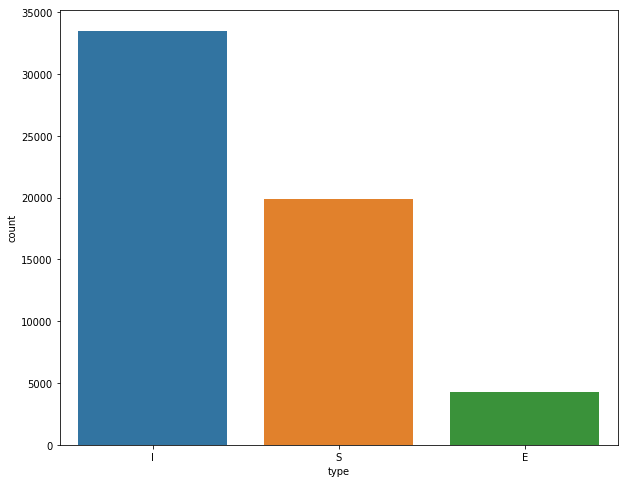

In [18]:
sns.countplot(data_cl["type"], order=["I", "S", "E"])

## Veo valores faltantes

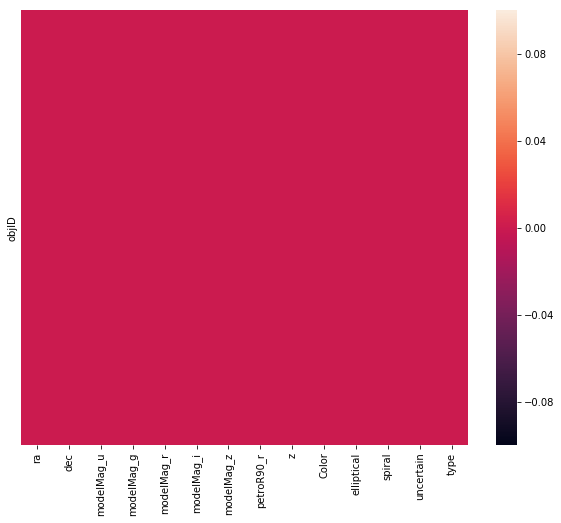

In [19]:
sns.heatmap(data_cl.isna(), yticklabels=False)

No tengo valores NaN. Pero puede que tenga valores que fisicamente no tienen sentido

## Distribucion de datos

In [20]:
def distribution_per_type(df, col_name="", bins=20):
    plt.title(f"{col_name.capitalize()} Distribution")
    sns.distplot(df[df["elliptical"] == 1][col_name],label="elliptical", bins=bins)
    sns.distplot(df[df["spiral"] == 1][col_name],label="spiral", bins=bins)
    sns.distplot(df[df["uncertain"] == 1][col_name],label="irregular", bins=bins)
    plt.legend()
    
def exploratory_plots(df, col_name=""):
    plt.subplot(3, 1, 1)
    distribution_per_type(df, col_name)
    plt.subplot(3, 1, 2)
    plt.title(f"{col_name.capitalize()} Boxplot")
    sns.boxplot(x="type", y=col_name, data=df)

    plt.subplot(3, 1, 3)
    plt.title(f"{col_name.capitalize()} Boxplot w/o Outliers")
    sns.boxplot(x="type", y=col_name, data=df, showfliers=False)
    
    plt.tight_layout()

### Z (red shift)

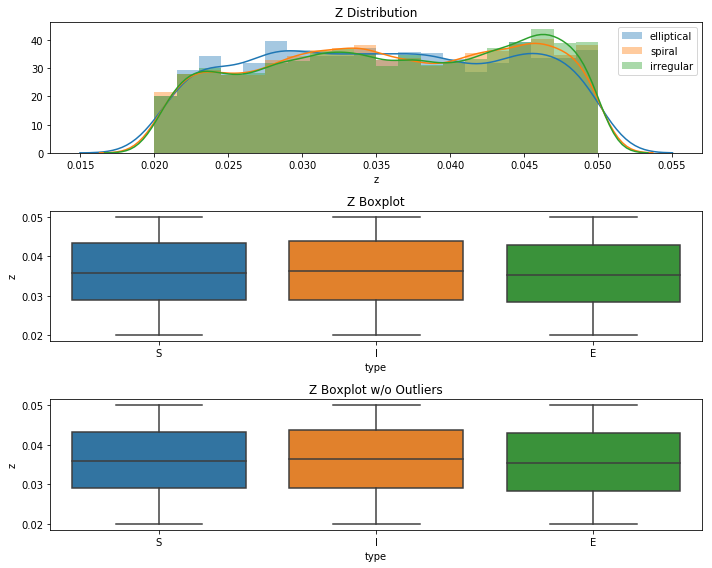

In [21]:
exploratory_plots(data_cl, "z")

_____________________
La columna "z", tiene una ditribcuion uniforme y no parece tener outliers
_____________________

### Color

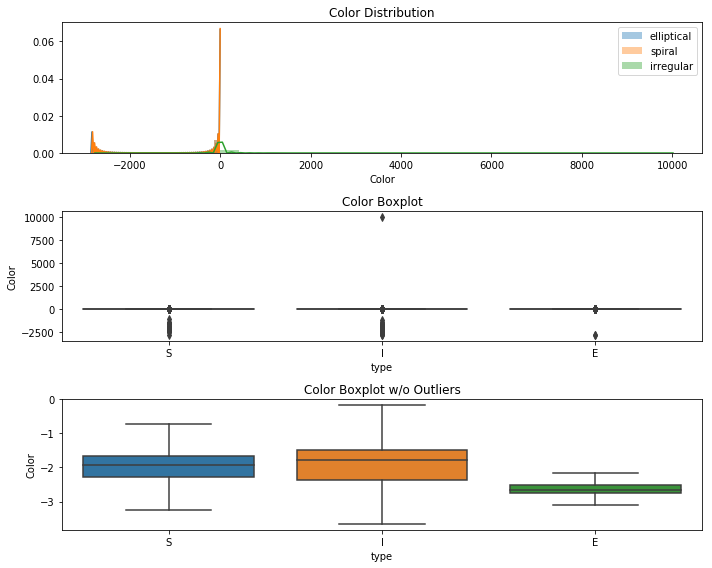

In [22]:
exploratory_plots(data_cl, "Color")

Vemos que hay valores muy extremos, mientras que gran parte de la distribucion esta en valores alrededor de 0

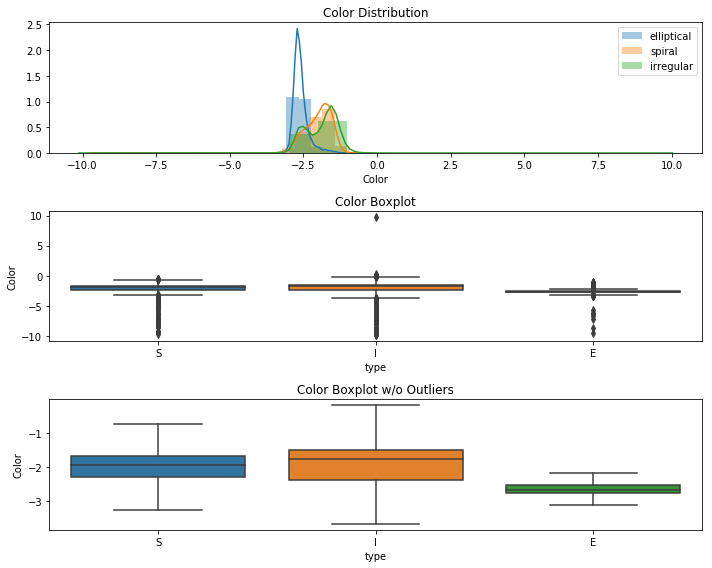

In [23]:
mask_color = (data_cl["Color"] < 10) & (data_cl["Color"]>-10)
exploratory_plots(data_cl[mask_color], "Color")


Podemos decir que los datos de color que tienen sentido deben estar entre 0 y -5

In [24]:
mask_color = (data_cl["Color"] < 0) & (data_cl["Color"]>-5)
data_cl_color = data_cl[mask_color]

In [25]:
print(data_cl.shape)
print(data_cl_color.shape)

(57681, 14)
(57506, 14)


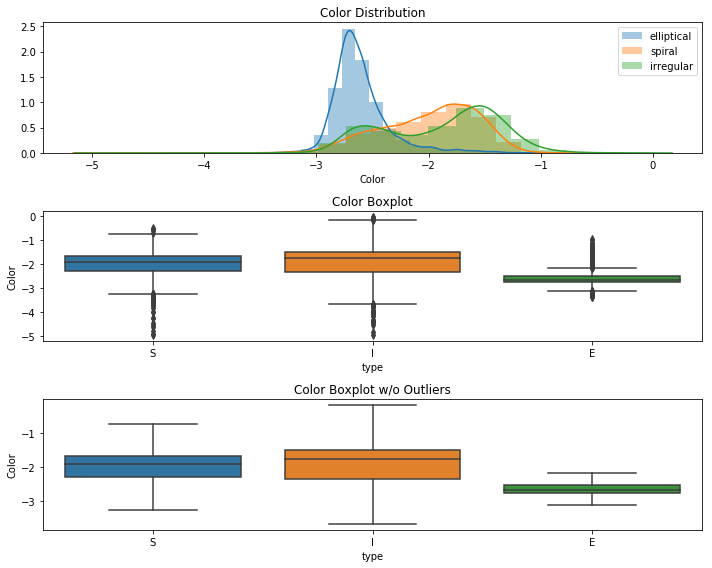

In [26]:
exploratory_plots(data_cl_color, "Color")

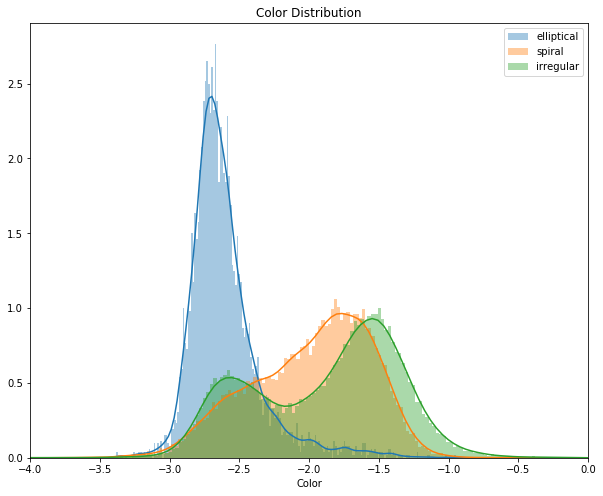

In [27]:
distribution_per_type(data_cl_color, col_name="Color", bins=200)
_ = plt.xlim([-4, 0])

### petroR90_r

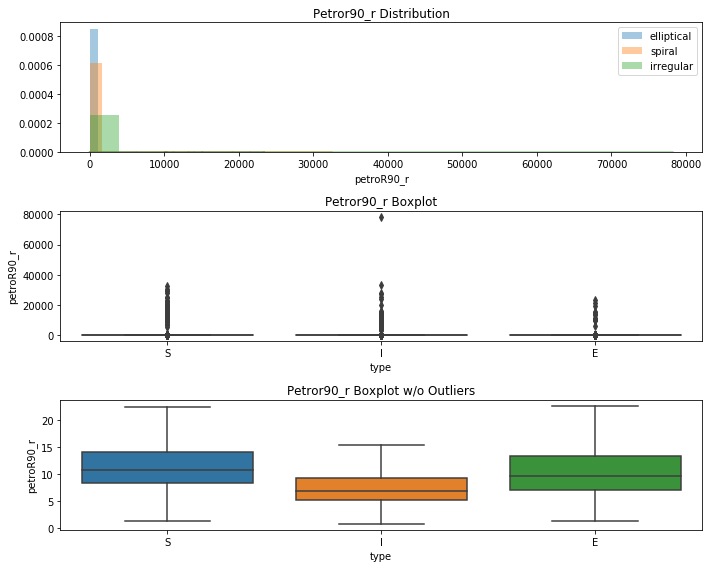

In [28]:
exploratory_plots(data_cl, "petroR90_r")

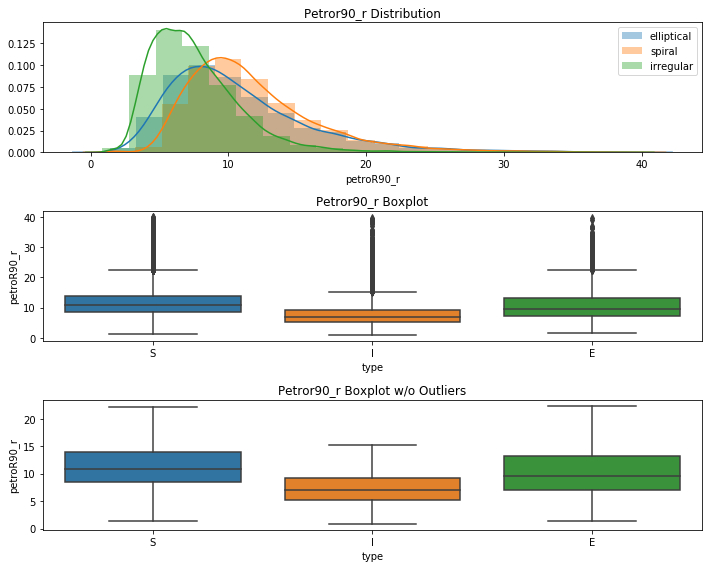

In [29]:
mask_petro = data_cl["petroR90_r"]<40
data_cl_petro = data_cl[mask_petro]
exploratory_plots(data_cl_petro, "petroR90_r")

In [30]:
data_cl_petro = data_cl[data_cl["petroR90_r"]<40]

In [31]:
print(data_cl.shape)
print(data_cl_petro.shape)

(57681, 14)
(57428, 14)


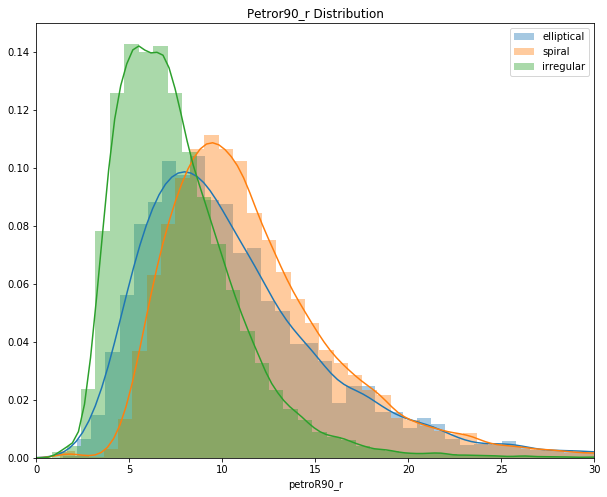

In [32]:
distribution_per_type(data_cl_petro, col_name="petroR90_r", bins=50)
_ = plt.xlim([0, 30])


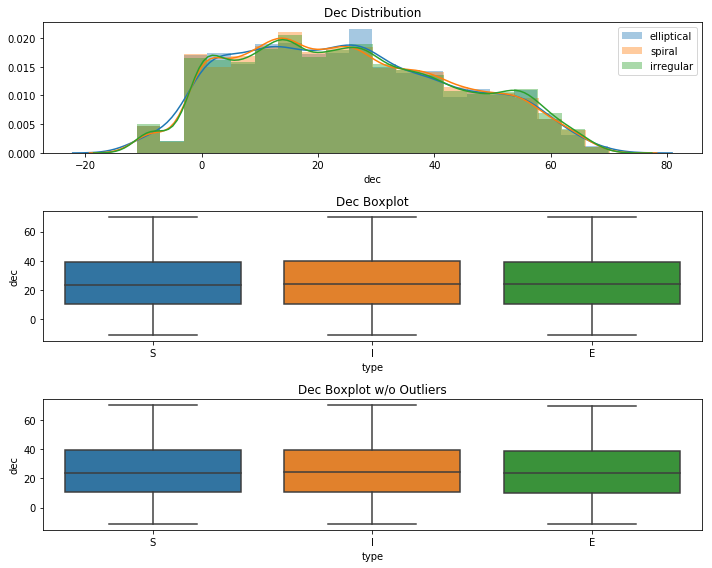

In [33]:
exploratory_plots(data_cl, "dec")

### Ra

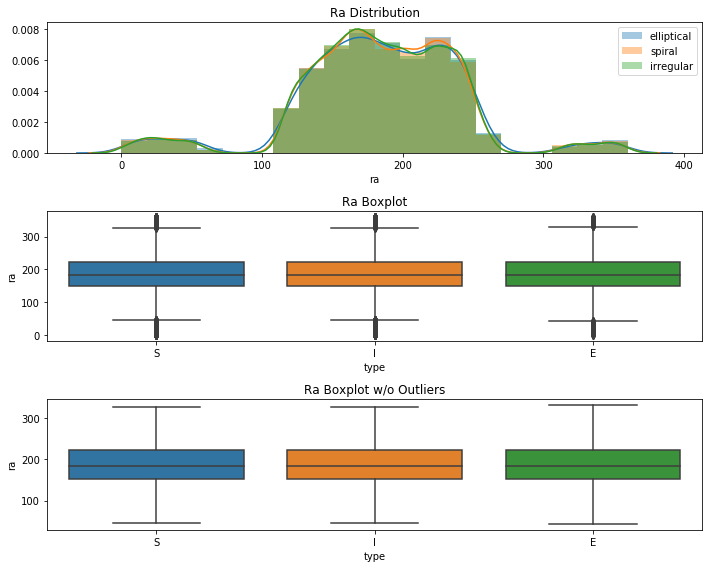

In [34]:
exploratory_plots(data_cl, "ra")

### Mag Distributions

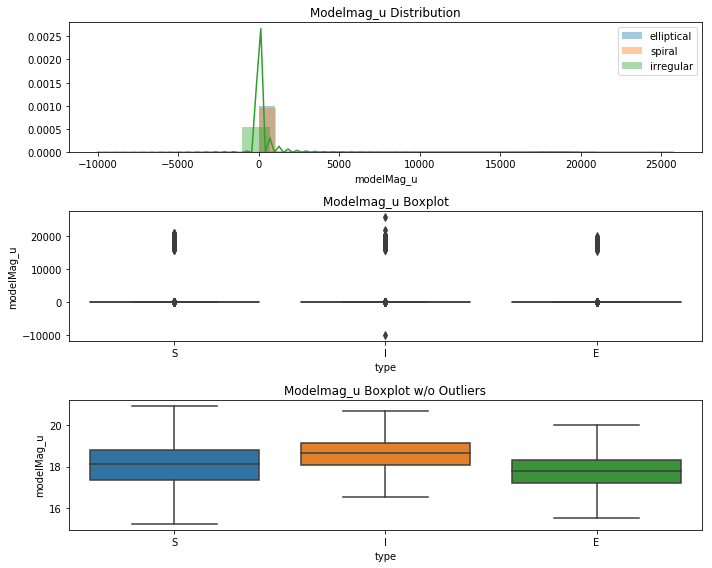

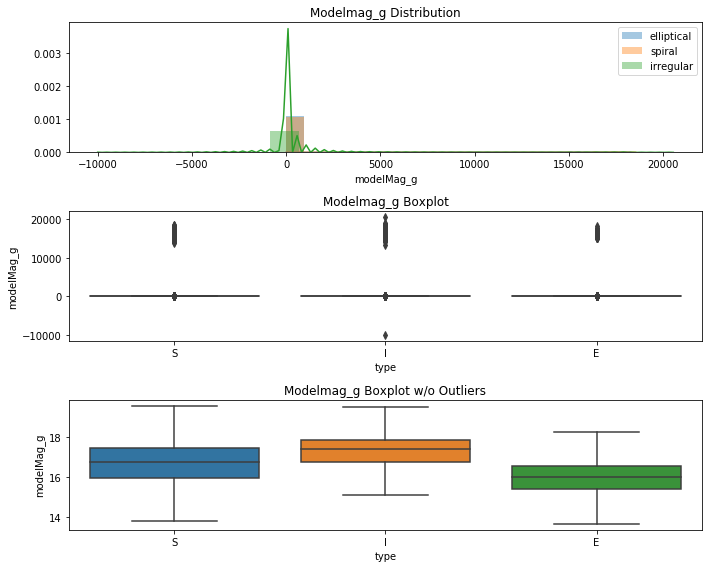

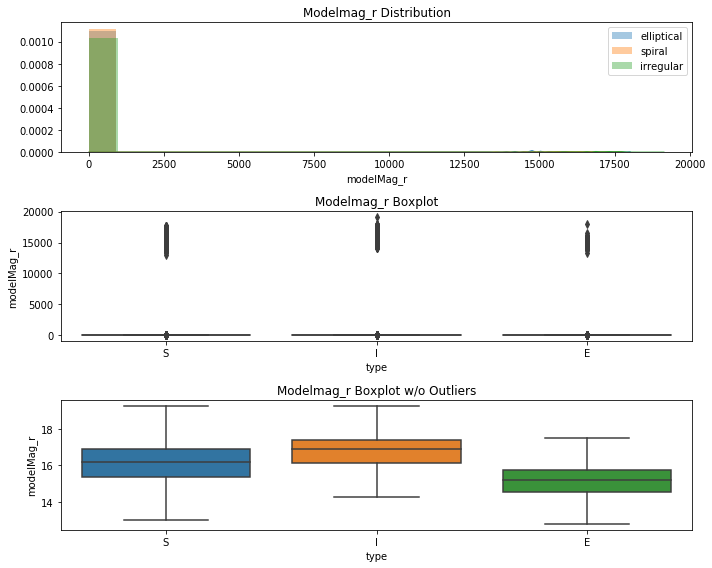

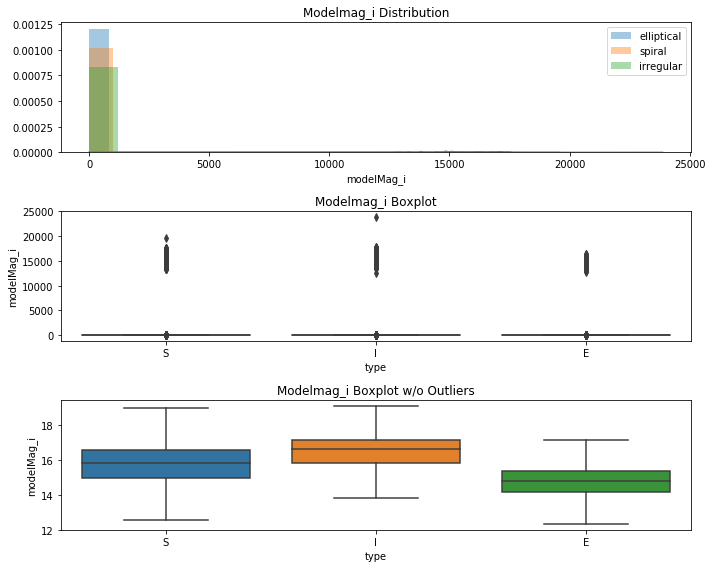

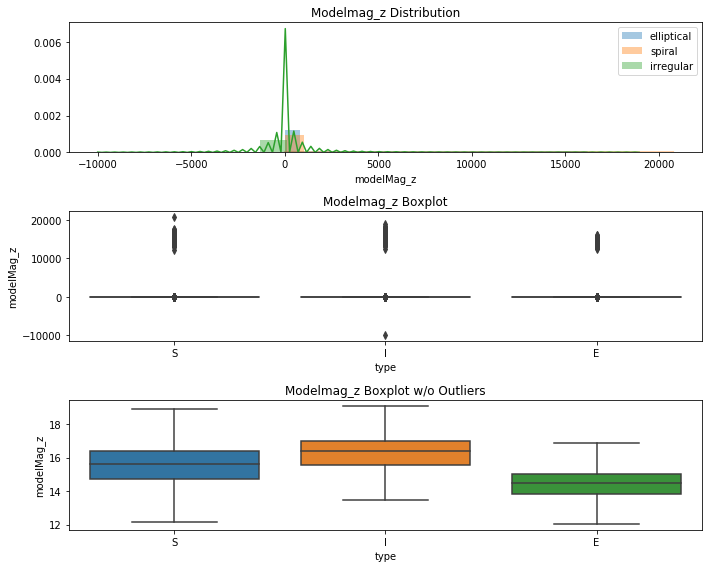

In [35]:
for mag in ['modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i','modelMag_z']:
    plt.figure()
    exploratory_plots(data_cl, mag)

In [36]:
mask_mag = ((abs(data_cl["modelMag_u"]) < 30) & 
    (abs(data_cl["modelMag_g"] < 30)) & 
    (abs(data_cl["modelMag_r"] < 30)) & 
    (abs(data_cl["modelMag_i"] < 30)) & 
    (abs(data_cl["modelMag_z"] < 30))) 
data_cl_mag = data_cl[mask_mag]
data_cl_mag.shape

(55164, 14)

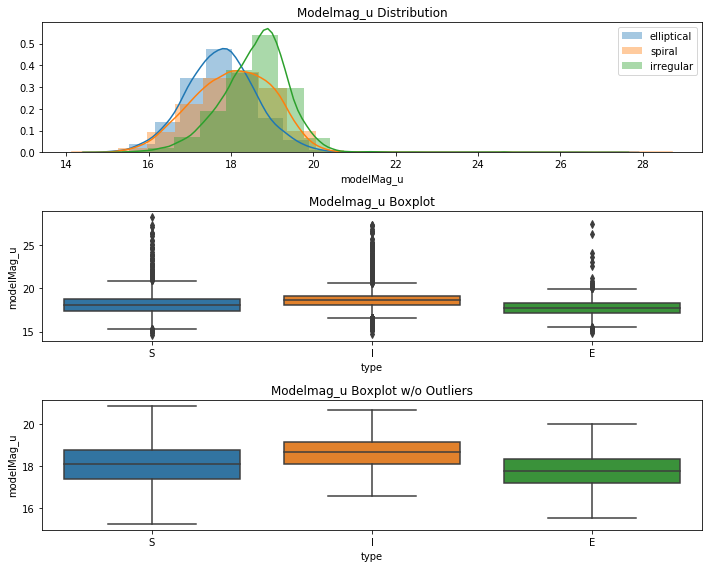

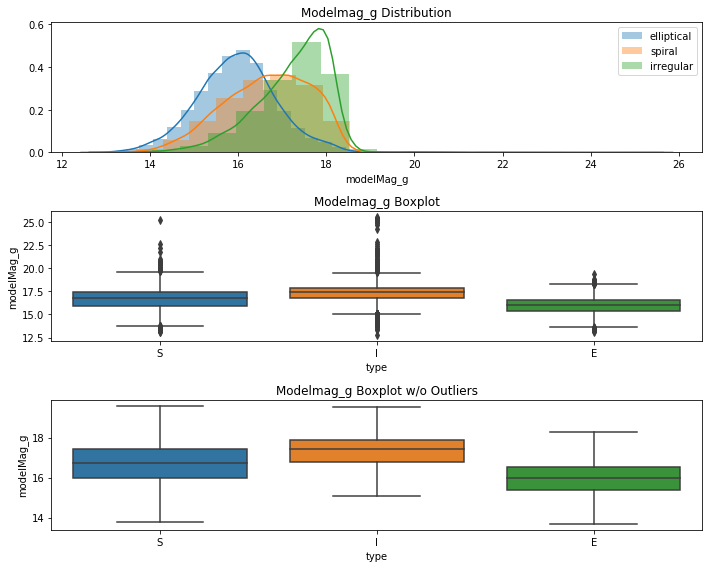

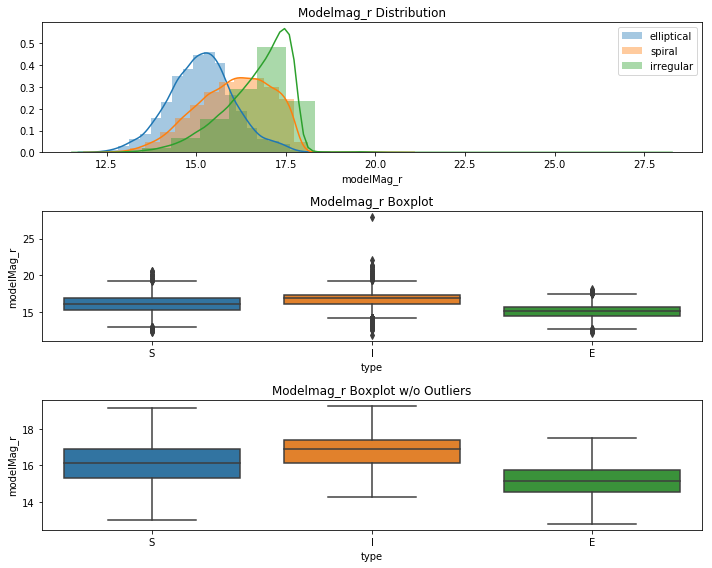

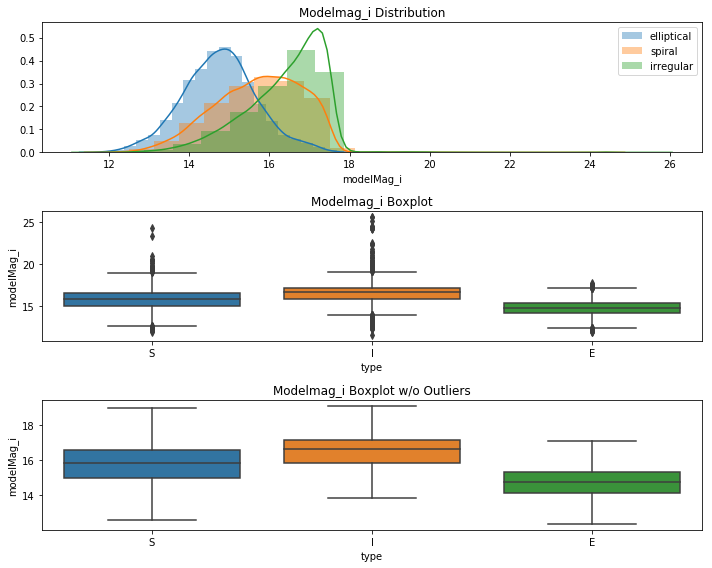

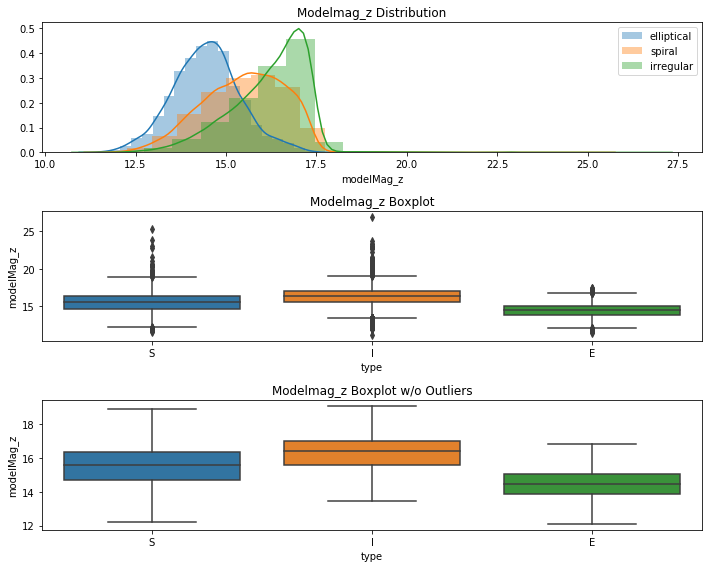

In [37]:
for mag in ['modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i','modelMag_z']:
    plt.figure()
    exploratory_plots(data_cl_mag, mag)

In [38]:
mask_no_outl = mask_color & mask_petro & mask_mag
data_cl_no_outl = data_cl[mask_no_outl].copy()
print(data_cl.shape)
print(data_cl_no_outl.shape)
print(data_cl_no_outl.shape[0]/data_cl.shape[0]*100)

(57681, 14)
(54764, 14)
94.94287547025884


Sacando los outliers, solo estoy descartando ~5000 de un total de ~57000. Aun no tengo el 95% de los datos. Por lo tanto acepto el descarte de esots datos

In [39]:
data_cl_no_outl.head()

,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain,type
objID,,,,,,,,,,,,,,
"1,23765119242489E+018",116.519097,39.886407,17.76235,16.72601,16.33972,16.06614,15.90478,8.393773,0.041521,-1.422625,0,1,0,S
"1,23765149575578E+018",116.451900,41.421270,18.12179,16.26214,15.39272,14.97515,14.65105,9.674847,0.040211,-2.729061,0,0,1,I
"1,23767370611537E+018",115.946713,41.918877,18.57293,17.42053,17.01788,16.75617,16.70899,11.277470,0.024386,-1.555044,0,0,1,I
"1,2376737066523E+018",116.051943,42.287231,21.37438,19.77335,19.55791,20.35405,18.88184,1.539542,0.039137,-1.816479,0,0,1,I
"1,23765127349266E+018",117.287392,43.434782,19.18845,17.99682,17.51119,17.26241,17.09056,12.471450,0.042591,-1.677259,0,0,1,I


#### Elimino dataframes que no uso más

In [40]:
del data_cl_color
del data_cl_mag
del data_cl_petro

In [41]:
def num_type(row):
    if row["type"] == "I":
        return 1
    elif row["type"] == "S":
        return 2
    else:
        return 3
data_cl_no_outl["type_n"] = data_cl_no_outl.apply(num_type,axis=1)
data_cl["type_n"] = data_cl.apply(num_type,axis=1)

# Clustering

In [43]:
from sklearn.cluster import DBSCAN, KMeans,  MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

In [44]:
data_cl_no_outl.columns

Index(['ra', 'dec', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i',
       'modelMag_z', 'petroR90_r', 'z', 'Color', 'elliptical', 'spiral',
       'uncertain', 'type', 'type_n'],
      dtype='object')

## Muestra Estratificada

In [45]:
from sklearn.model_selection import StratifiedShuffleSplit

In [46]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=2411)

In [47]:
data_cl_no_outl.columns

Index(['ra', 'dec', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i',
       'modelMag_z', 'petroR90_r', 'z', 'Color', 'elliptical', 'spiral',
       'uncertain', 'type', 'type_n'],
      dtype='object')

In [48]:
for train_idx, test_idx in sss.split(data_cl_no_outl, data_cl_no_outl["type_n"]):
    #strat_train_set = data_cl_no_outl.loc[train_idx]
    strat_test_set  = data_cl_no_outl.iloc[test_idx]

## Análisis sin variables de ubicación y tipo

In [74]:
pos_cols  = ["ra", "dec"]
type_cols = ['elliptical', 'spiral', 'uncertain', 'type', 'type_n']
data_clus_pos = strat_test_set.drop(type_cols, axis=1)
data_clus_pos = StandardScaler().fit_transform(data_clus_pos)
data_clus     = strat_test_set.drop(type_cols + pos_cols, axis=1)
data_clus_cols = data_clus.columns
data_clus     = pd.DataFrame(data=StandardScaler().fit_transform(data_clus), 
                             columns=data_clus_cols)


In [75]:
def plot_silouette(silhouette_values, cluster_labels, silhouette_avg, 
                   title="Visualizacion de los datos"):
    fig, ax1 = plt.subplots(1, 1)
    y_lower = 10
    n_clusters = len(np.unique(cluster_labels))
    for i in np.unique(cluster_labels):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color   = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(title)
    # ax1.set_xlabel("espacio de la primera caracteristica")
    # ax1.set_ylabel("espacio de la segunda caracteristica")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

Vamos a evaluar diferentes métodos de clustering. No todos ellos disponen de una métrica de **inercia** (ya que la misma se define para clusteres circulares). Por lo tanto para comparar los diferentes métodos vamos a usar gráficos de silueta. 

Al final de cada metodo haremos conclusiones parciales y una final antes de pasar a utilziar el mejor método junto con embeddings


### K-Means

In [76]:
range_n_clusters = [2, 3, 4, 5, 6]
def serch_k_optimus(data_clus, range_n_clusters):
    sse ={}
    for n_clusters in range_n_clusters:
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_jobs=6)
        print("Start fitting")
        cluster_labels = clusterer.fit_predict(data_clus)
        print("Stop fitting")
        sse[n_clusters] = clusterer.inertia_

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(data_clus, cluster_labels, random_state=352)
        print("Para n_clusters =", n_clusters,
              "El silhouette_score promedio es :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(data_clus, cluster_labels)

        plot_silouette(sample_silhouette_values, cluster_labels,
                       silhouette_avg, title="k={}".format(n_clusters))
    return sse


Start fitting
Stop fitting
Para n_clusters = 2 El silhouette_score promedio es : 0.4066411598391905


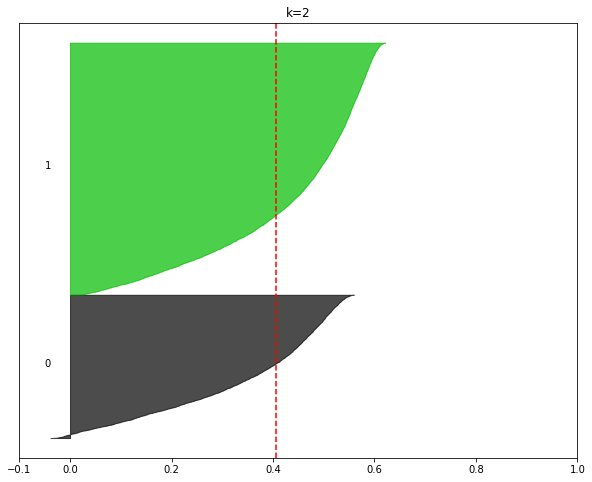

Start fitting
Stop fitting
Para n_clusters = 3 El silhouette_score promedio es : 0.29056193235326266


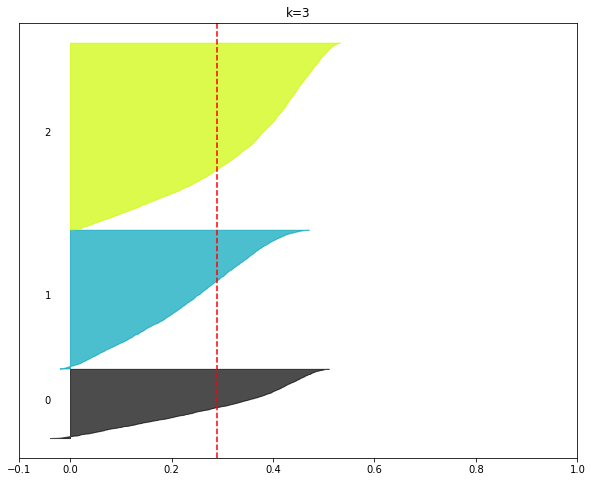

Start fitting
Stop fitting


KeyboardInterrupt: 

In [77]:
sse = serch_k_optimus(data_clus, range_n_clusters)

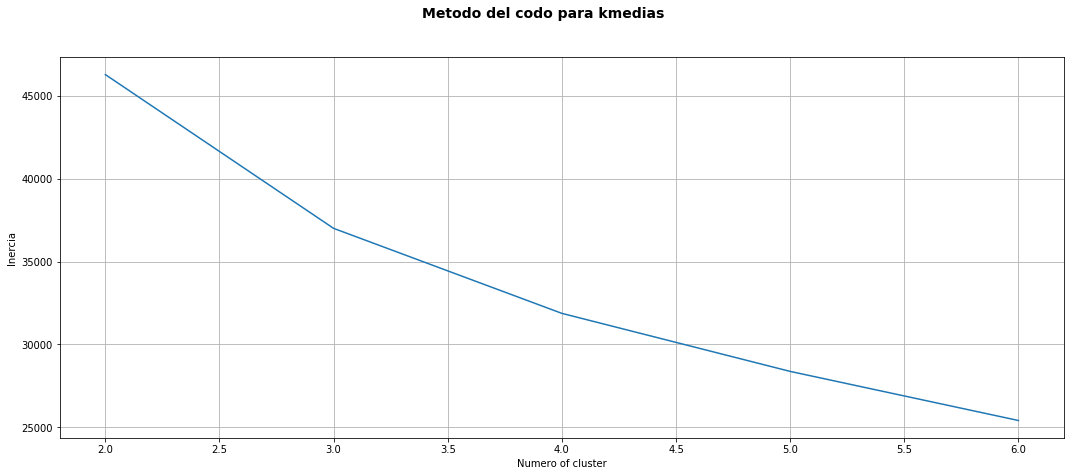

In [67]:
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.suptitle(("Metodo del codo para kmedias "),
                 fontsize=14, fontweight='bold')
ax1.plot(list(sse.keys()), list(sse.values()))
ax1.set_xlabel("Numero of cluster")
ax1.set_ylabel("Inercia")
plt.grid()

De las siluetas, vemos que al incrementar el número de clusters el score promedio ba disminuyendo, lo que no es algo deseado. Pero, por otro lado vemos que con 2 clusters uno de ellos es mucho más grande que el otro, y que con k=3 o k=4 tenemos la mejor distribución en los tamaños. 

Es importante notar que en ninguno de los clusters presenta colas negativas muy grandes, lo que indica que los clusters se estan separando bien. 

K-Means CLustering si dispone de la métrica de **inercia** por lo que utilizamos el método del codo como segunda opinión a analísis de siluetas. Vemos que la pendiente cambia abruptamente en k=3 y un poco menos en k=4.

Por lo tanto, podemos decir que el número de clusters esta en k=3 o k=4. Vamos a ver más adelante que información podemos obtener utilizando embeddings


### DBScan

In [54]:
from itertools import product

DBSCAN nos devuelve una etiqueta -1 para las muestras rudiosas. Por lo tanto, si tenemos un clustering con mucha de esas muestras lo descartamos

In [55]:
n_min_samples = [2, 3, 4]
n_eps         = [0.2, 0.25, 0.3, 0.35]
noise_ratio_limit = 0.47
def search_dbscan_optimus(data_clus, n_min_samples, n_eps, noise_ratio_limit):
    for min_samples, eps in product(n_min_samples, n_eps):
        print("*"*80)
        print("min_samples={} y eps={}".format(min_samples, eps))
        print("*"*80)
        dbscan_clusters = DBSCAN(eps=eps, min_samples=min_samples)
        print("Start fitting")
        cluster_labels = dbscan_clusters.fit_predict(data_clus, )
        print("Stop fitting")
        noise_samples_ratio = sum(cluster_labels == -1) / len(cluster_labels)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        if len(np.unique(cluster_labels)) > 1 and noise_samples_ratio<noise_ratio_limit:
            silhouette_avg = silhouette_score(data_clus, cluster_labels,
                                              random_state=352)
            print("El silhouette_score promedio es :", silhouette_avg)

            # Compute the silhouette scores for each sample
            sample_silhouette_values = silhouette_samples(data_clus, 
                                                          cluster_labels)

            plot_silouette(sample_silhouette_values, cluster_labels,
                           silhouette_avg, title="{}-{}".format(eps, min_samples))
        elif len(np.unique(cluster_labels)) == 1:
            print("Solo 1 cluster identificado")
        elif noise_samples_ratio>=noise_ratio_limit:
            print("El cluster ruido es muy grande: {}".format(noise_samples_ratio))

********************************************************************************
min_samples=2 y eps=0.2
********************************************************************************
Start fitting
Stop fitting
El cluster ruido es muy grande: 0.7028211448918105
********************************************************************************
min_samples=2 y eps=0.25
********************************************************************************
Start fitting
Stop fitting
El silhouette_score promedio es : -0.36139200343797445


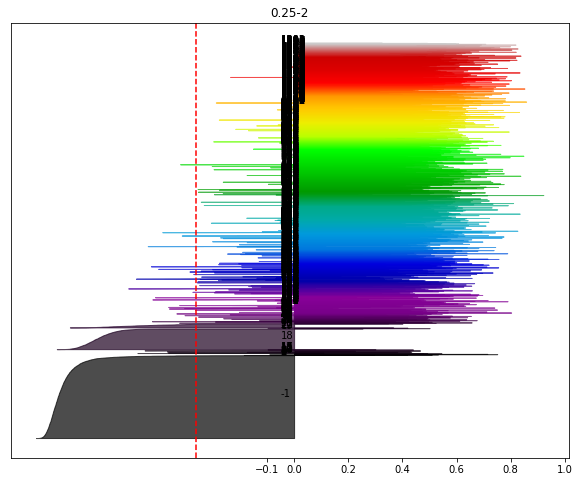

********************************************************************************
min_samples=2 y eps=0.3
********************************************************************************
Start fitting
Stop fitting
El silhouette_score promedio es : -0.4995462054677326


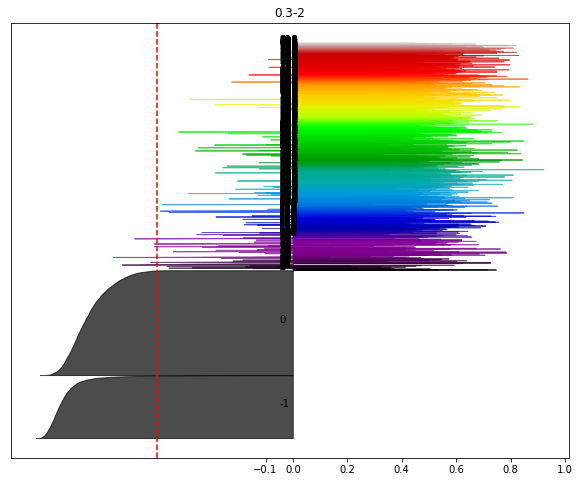

********************************************************************************
min_samples=2 y eps=0.35
********************************************************************************
Start fitting
Stop fitting
El silhouette_score promedio es : -0.586676658204438


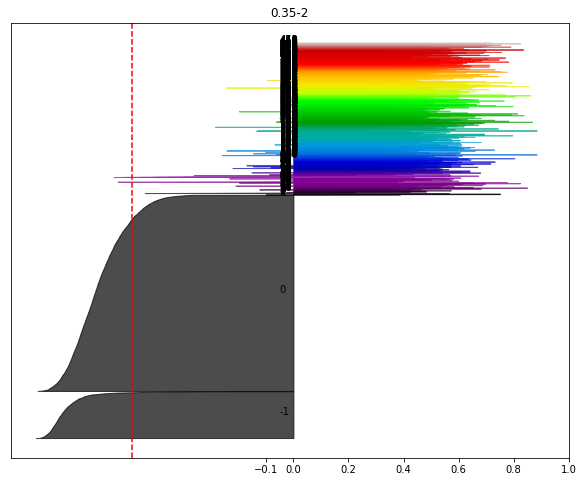

********************************************************************************
min_samples=3 y eps=0.2
********************************************************************************
Start fitting
Stop fitting
El cluster ruido es muy grande: 0.8483520496667579
********************************************************************************
min_samples=3 y eps=0.25
********************************************************************************
Start fitting
Stop fitting
El cluster ruido es muy grande: 0.600657354149548
********************************************************************************
min_samples=3 y eps=0.3
********************************************************************************
Start fitting
Stop fitting
El silhouette_score promedio es : -0.5662289748589515


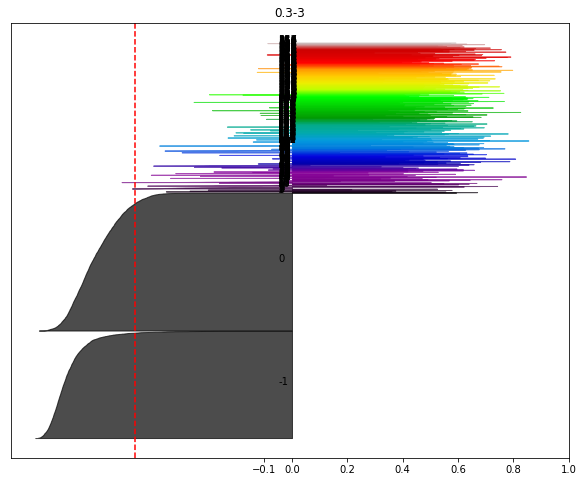

********************************************************************************
min_samples=3 y eps=0.35
********************************************************************************
Start fitting
Stop fitting
El silhouette_score promedio es : -0.589420630423244


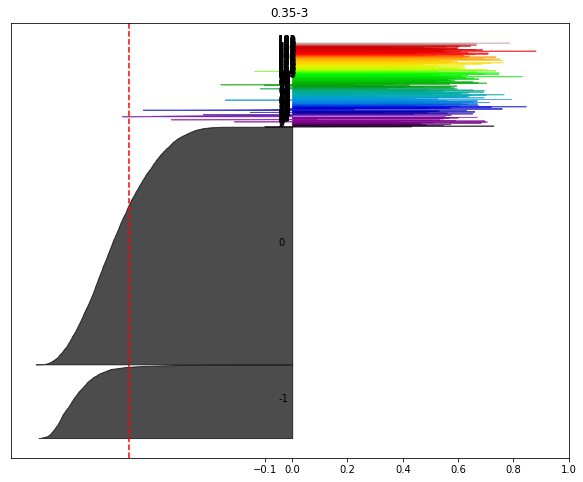

********************************************************************************
min_samples=4 y eps=0.2
********************************************************************************
Start fitting
Stop fitting
El cluster ruido es muy grande: 0.942481511914544
********************************************************************************
min_samples=4 y eps=0.25
********************************************************************************
Start fitting
Stop fitting
El cluster ruido es muy grande: 0.7262850360631791
********************************************************************************
min_samples=4 y eps=0.3
********************************************************************************
Start fitting
Stop fitting
El silhouette_score promedio es : -0.5934888025417029


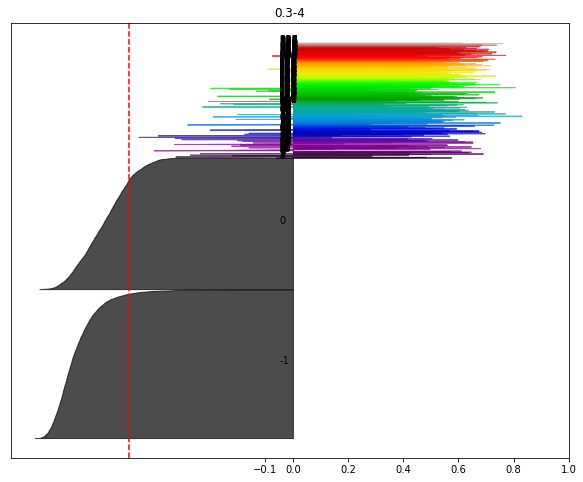

********************************************************************************
min_samples=4 y eps=0.35
********************************************************************************
Start fitting
Stop fitting
El silhouette_score promedio es : -0.6051385193556819


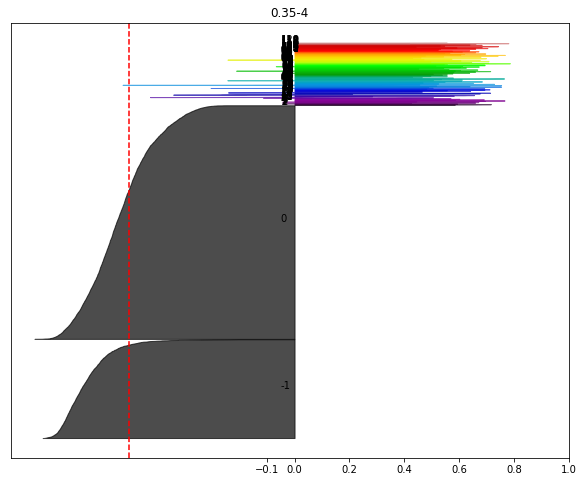

In [56]:
search_dbscan_optimus(data_clus, n_min_samples, n_eps, noise_ratio_limit)

DBScan presenta en general muchos clusters y algunos de gran tamaño, por lo tanto no parece ser un buen algoritmo para este conjunto de datos

### Gaussian Mixtures

In [57]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

def serch_gauss_optimus(data_clus, range_n_clusters):
    sse ={}
    for n_clusters in range_n_clusters:
        clusterer = GaussianMixture(n_components=n_clusters, random_state=10)
        print("Start fitting")
        cluster_labels = clusterer.fit_predict(data_clus)
        print("Stop fitting")
        #sse[n_clusters] = clusterer.inertia_

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(data_clus, cluster_labels, random_state=352)
        print("Para n_clusters =", n_clusters,
              "El silhouette_score promedio es :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(data_clus, cluster_labels)

        plot_silouette(sample_silhouette_values, cluster_labels,
                       silhouette_avg, title="k={}".format(n_clusters))
    return sse


Start fitting
Stop fitting
Para n_clusters = 2 El silhouette_score promedio es : 0.20575860629655854


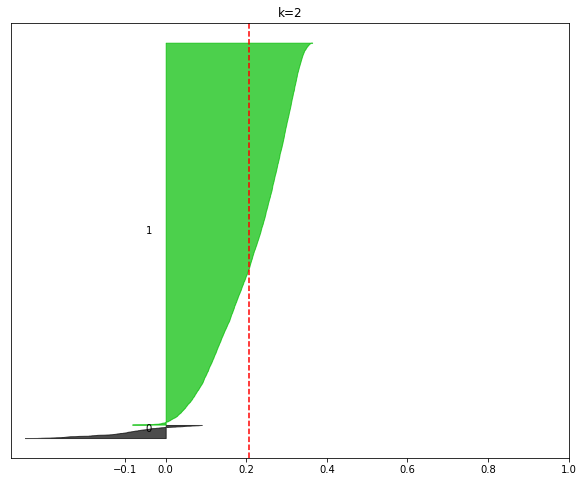

Start fitting
Stop fitting
Para n_clusters = 3 El silhouette_score promedio es : 0.2001128160485019


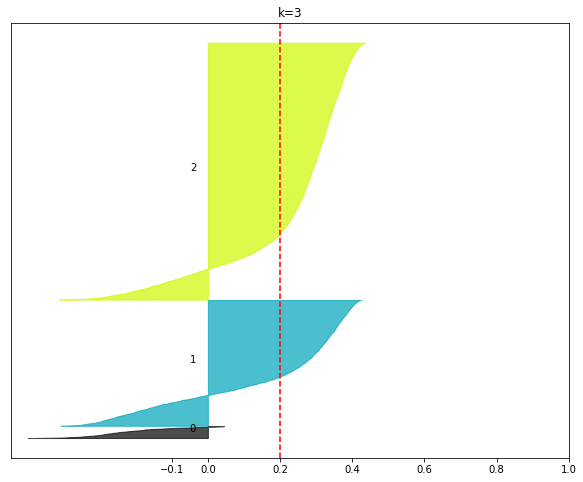

Start fitting
Stop fitting
Para n_clusters = 4 El silhouette_score promedio es : 0.1412729029900525


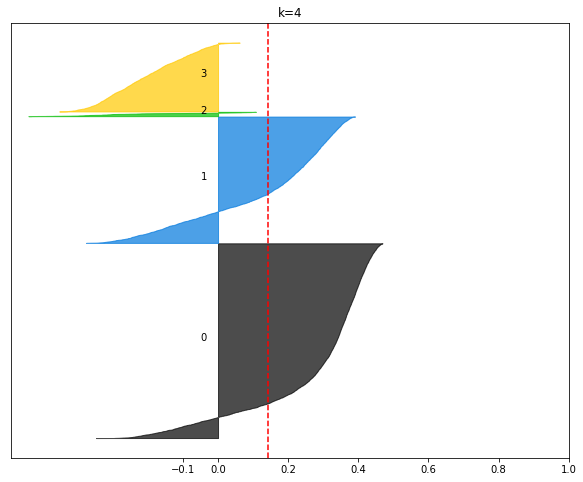

Start fitting
Stop fitting
Para n_clusters = 5 El silhouette_score promedio es : 0.016317813510311547


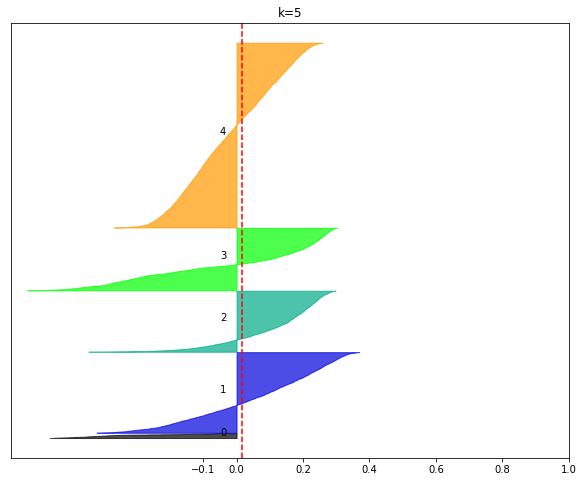

Start fitting
Stop fitting
Para n_clusters = 6 El silhouette_score promedio es : 0.018188289616214076


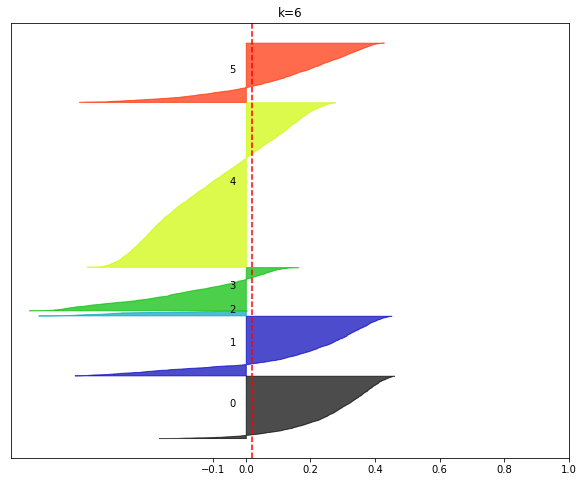

Start fitting
Stop fitting
Para n_clusters = 7 El silhouette_score promedio es : 0.028572093134639893


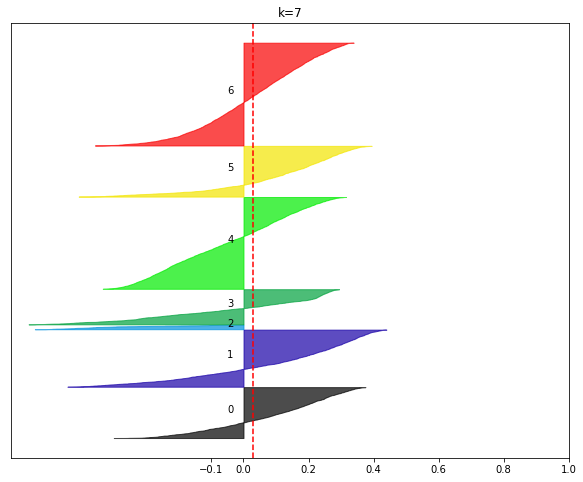

Start fitting
Stop fitting
Para n_clusters = 8 El silhouette_score promedio es : 0.029241794186039095


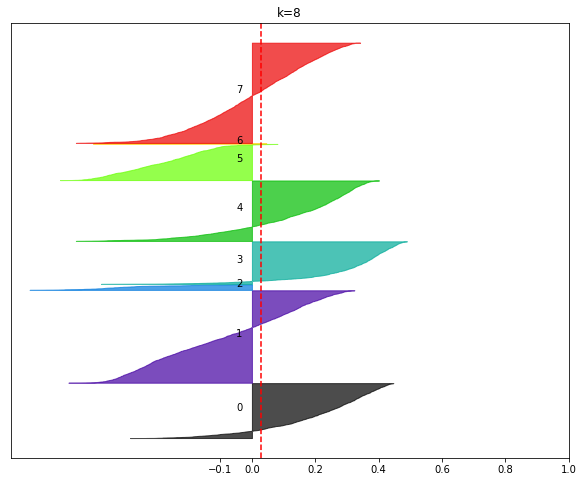

Start fitting
Stop fitting
Para n_clusters = 9 El silhouette_score promedio es : 0.03086141728984344


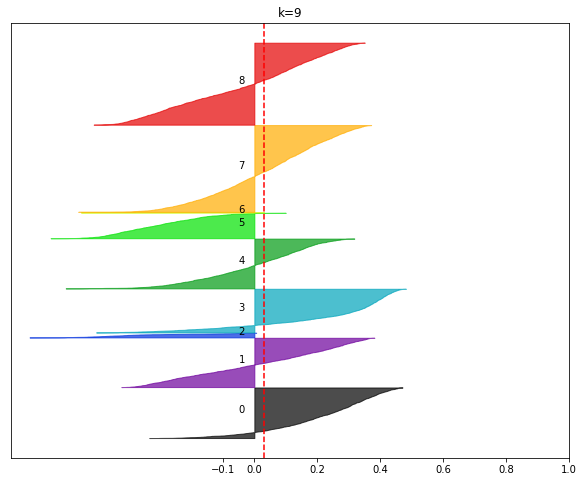

Start fitting
Stop fitting
Para n_clusters = 10 El silhouette_score promedio es : 0.02003784120983751


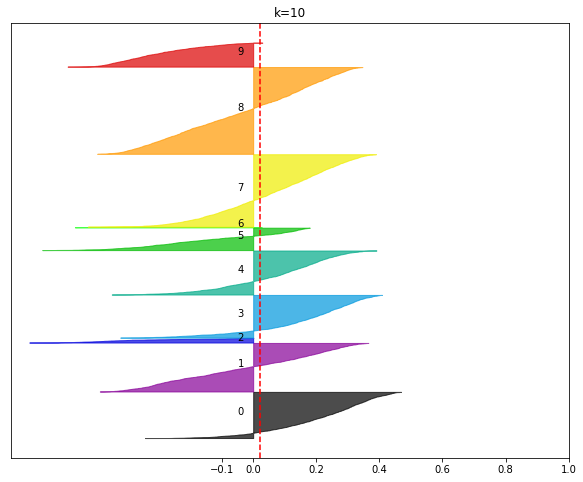

In [58]:
sse = serch_gauss_optimus(data_clus, range_n_clusters)

En este caso, el algoritmo Gaussian Mixture, presenta o clusters muy grandes o colas de valores negativos notorias en el analisis por siluetas, lo cual nos indica que hay mucha superposicion entre los clusters y no logra una buena separación

### Mean Shift

In [59]:
def serch_ms_optimus(data_clus, bandwidth):
    sse ={}
    for bw in bandwidth:
        clusterer = MeanShift(bandwidth=bw, bin_seeding=True)
        print("Start fitting")
        cluster_labels = clusterer.fit_predict(data_clus)
        print("Stop fitting")
        #sse[n_clusters] = clusterer.inertia_

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(data_clus, cluster_labels, random_state=352)
        print("Para bamdwith =", bw,
              "El silhouette_score promedio es :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(data_clus, cluster_labels)

        plot_silouette(sample_silhouette_values, cluster_labels,
                       silhouette_avg, title="bw={}".format(bw))
    return sse


Start fitting
Stop fitting
Para bamdwith = 1 El silhouette_score promedio es : 0.048581508299265455


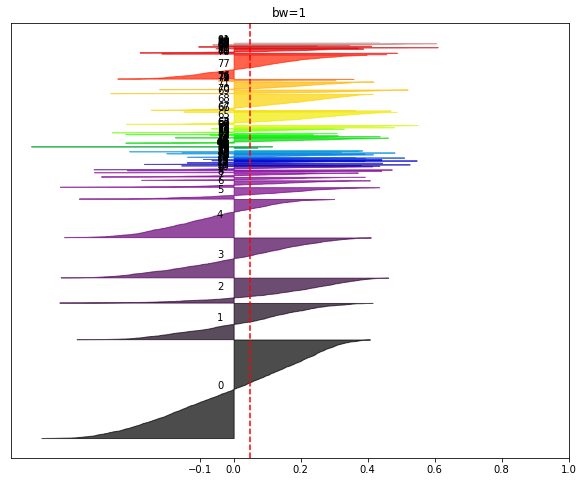

Start fitting
Stop fitting
Para bamdwith = 1.25 El silhouette_score promedio es : 0.05561728357711319


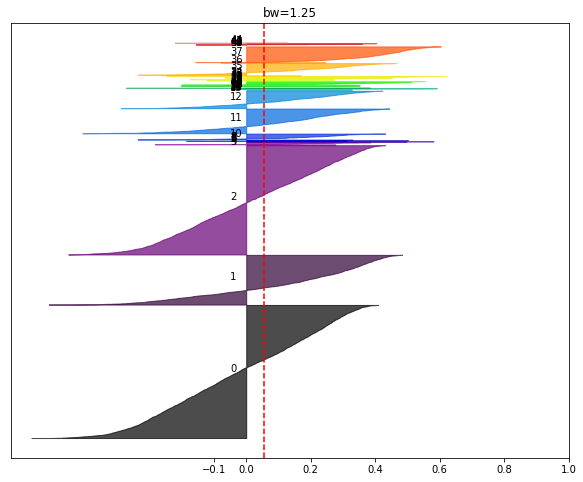

Start fitting
Stop fitting
Para bamdwith = 1.5 El silhouette_score promedio es : 0.06782756160766823


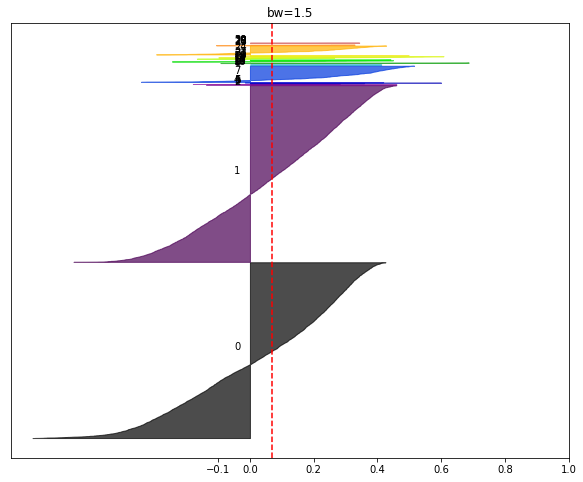

Start fitting
Stop fitting
Para bamdwith = 1.75 El silhouette_score promedio es : 0.05100630863782385


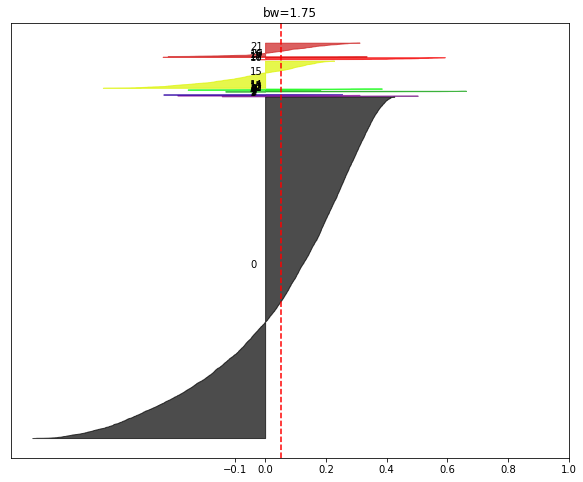

Start fitting
Stop fitting
Para bamdwith = 2 El silhouette_score promedio es : 0.05973664532286635


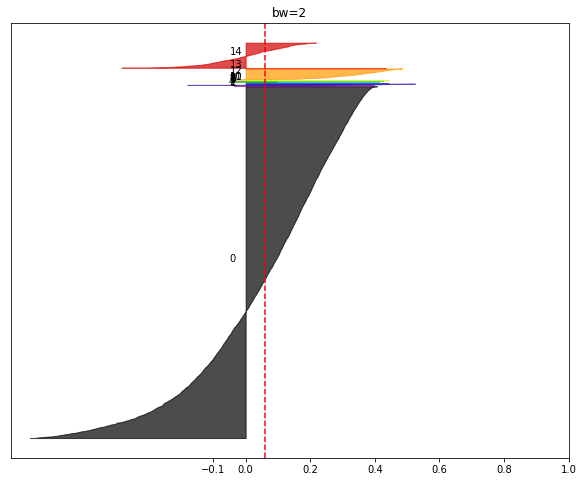

{}

In [64]:
bandwidth = [1, 1.25, 1.5, 1.75, 2]
serch_ms_optimus(data_clus, bandwidth)

En el analisis de silueta del algoritmo Mean Shift, se ven 2 problemas, muchos clusters y grandes colas negativas.

### Conclusión

De todos los métodos analisados el que mejor resultados presento fue k-means con un k=3 o K=4. Vamos a utilizar esos 2 y vamos a aplicar diferentes embeddings para ver que podemos obtener desde ahí

# Aplico K-means con k igual a 3 y 4

In [92]:
cluster_3 = KMeans(n_clusters=3, random_state=10, n_jobs=6)
cluster_labels_3 = cluster_3.fit_predict(data_clus)

cluster_4 = KMeans(n_clusters=4, random_state=531, n_jobs=6)
cluster_labels_4 = cluster_4.fit_predict(data_clus)

In [93]:
data_clus_k3 = data_clus.copy()
data_clus_k4 = data_clus.copy()
data_clus_k3["cluster_label"] = cluster_labels_3
data_clus_k4["cluster_label"] = cluster_labels_4

## Visualizacion segun cluster label

In [182]:
def distribution_per_label(df, col_name="", bins=20):
    plt.title(f"{col_name.capitalize()} Distribution")
    for kk in df["cluster_label"].unique():
        sns.distplot(df[df["cluster_label"] == kk][col_name],label=f"cluster_label={kk}", 
                     bins=bins)
    plt.legend()
    
def exploratory_plots_label(df, col_name=""):
    plt.subplot(2, 1, 1)
    distribution_per_label(df, col_name)
    plt.subplot(2, 1, 2)
    plt.title(f"{col_name.capitalize()} Boxplot w/o Outliers")
    sns.boxplot(x="cluster_label", y=col_name, data=df, showfliers=False)
    
    plt.tight_layout()

### z

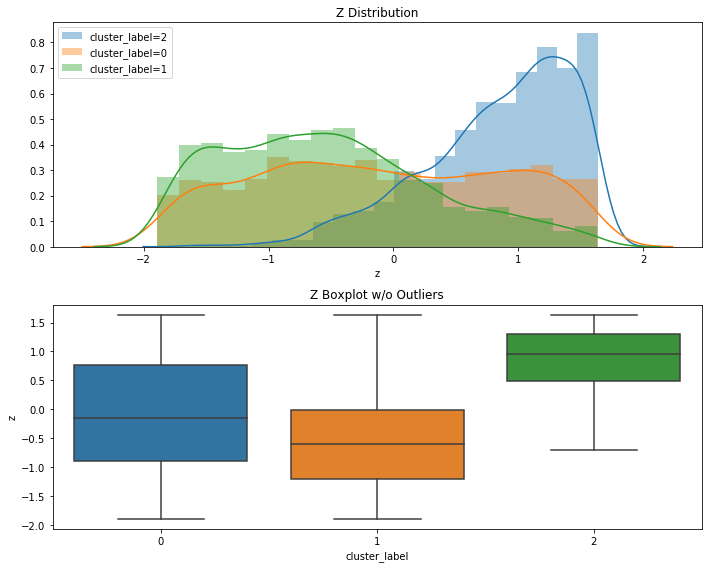

In [188]:
exploratory_plots_label(data_clus_k3, "z")

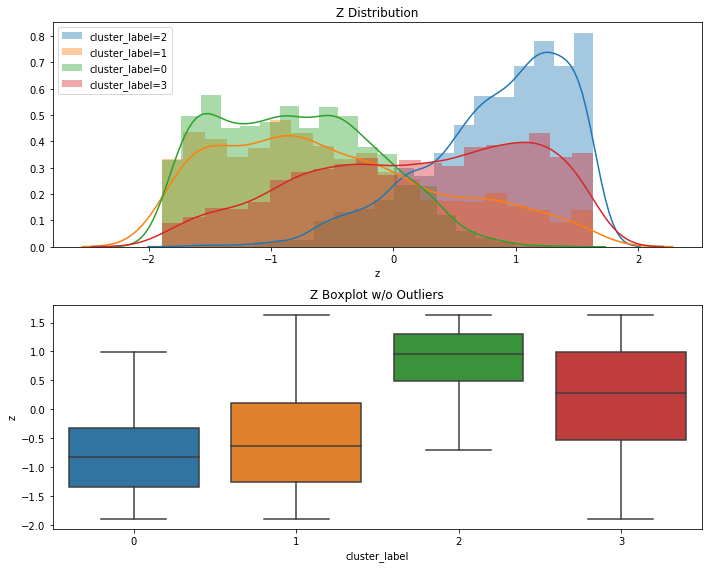

In [189]:
exploratory_plots_label(data_clus_k4, "z")

### Color

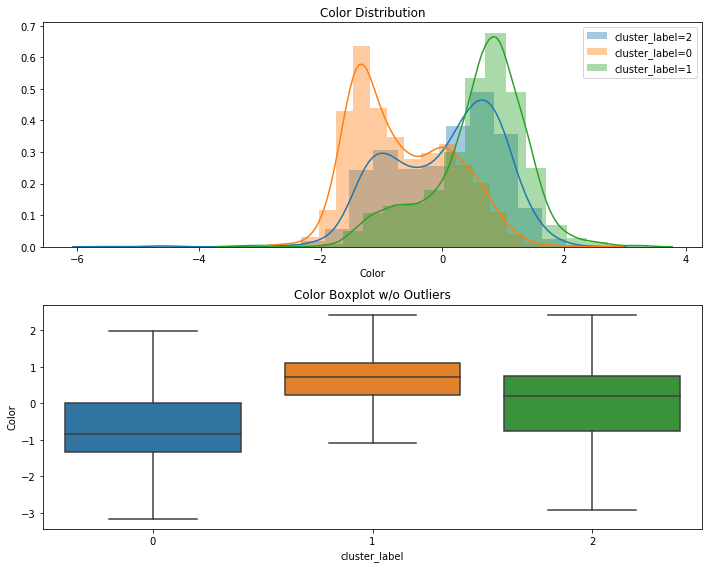

In [183]:
exploratory_plots_label(data_clus_k3, "Color")

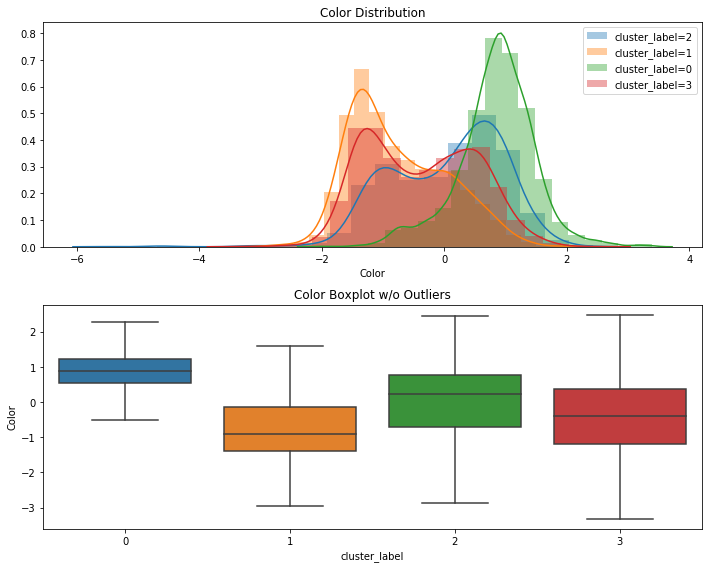

In [186]:
exploratory_plots_label(data_clus_k4, "Color")

### Petro R90

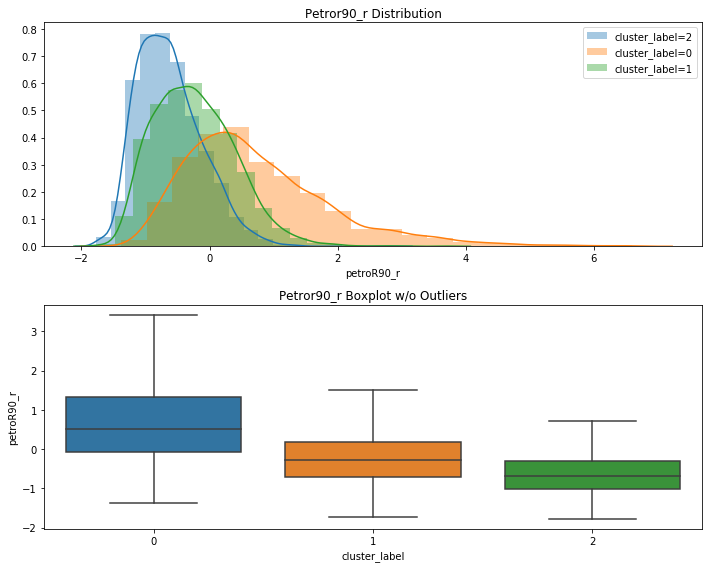

In [185]:
exploratory_plots_label(data_clus_k3, "petroR90_r")

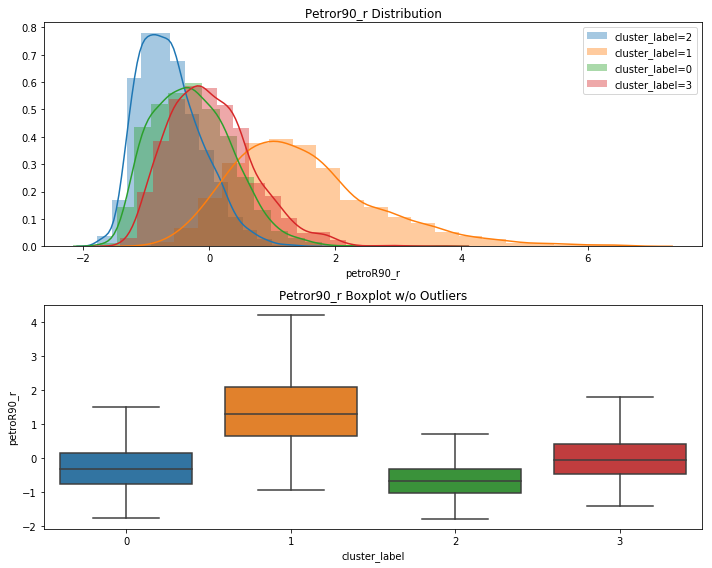

In [187]:
exploratory_plots_label(data_clus_k4, "petroR90_r")

### Mag Distributions

#### k = 3

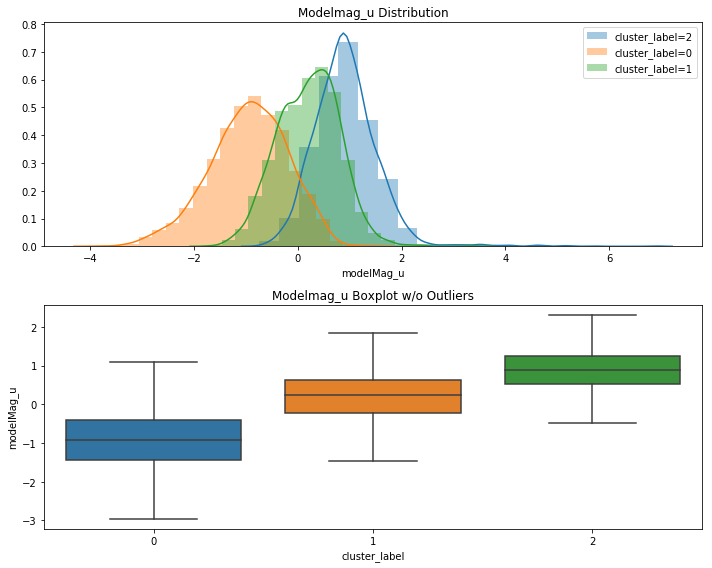

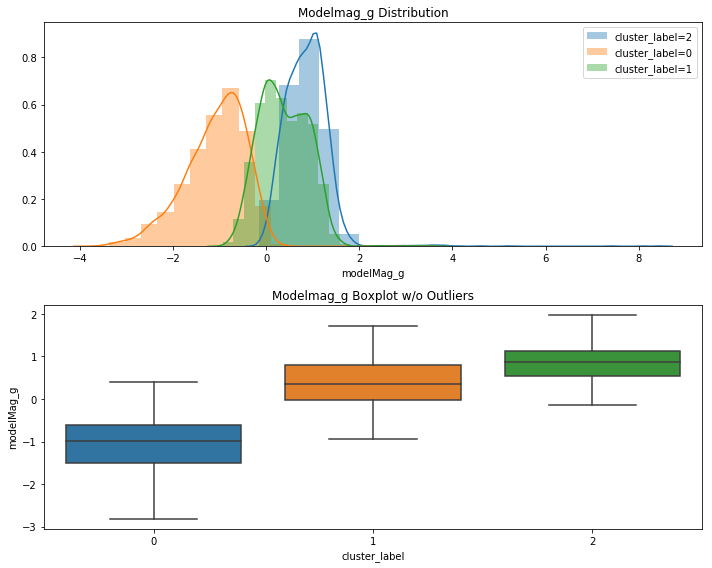

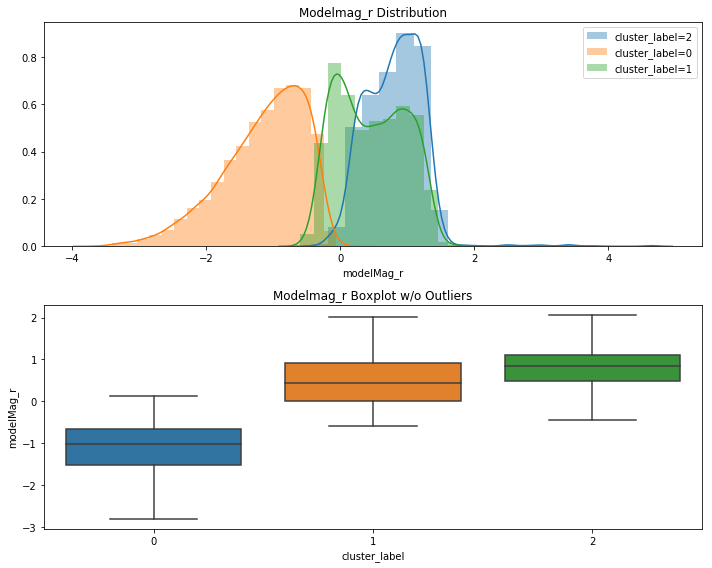

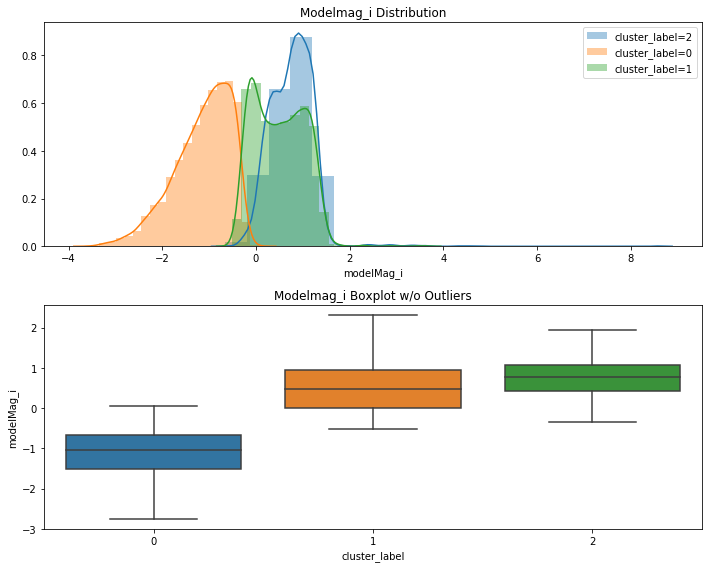

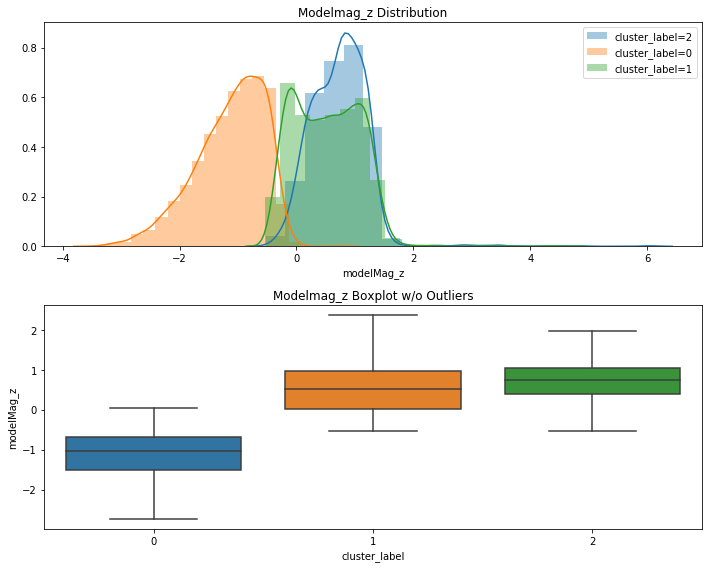

In [190]:
for mag in ['modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i','modelMag_z']:
    plt.figure()
    exploratory_plots_label(data_clus_k3, mag)

#### k = 4

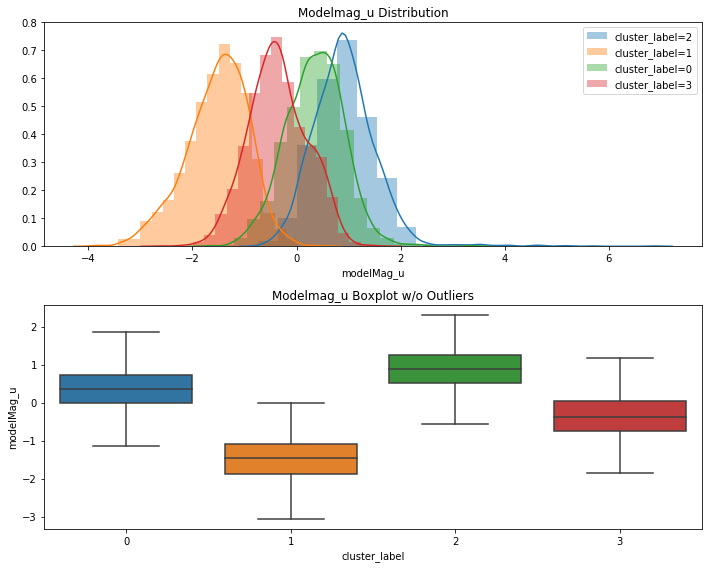

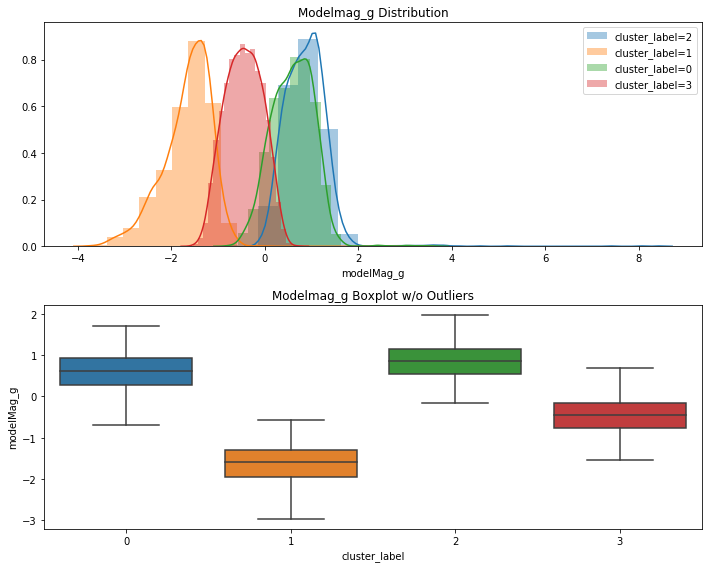

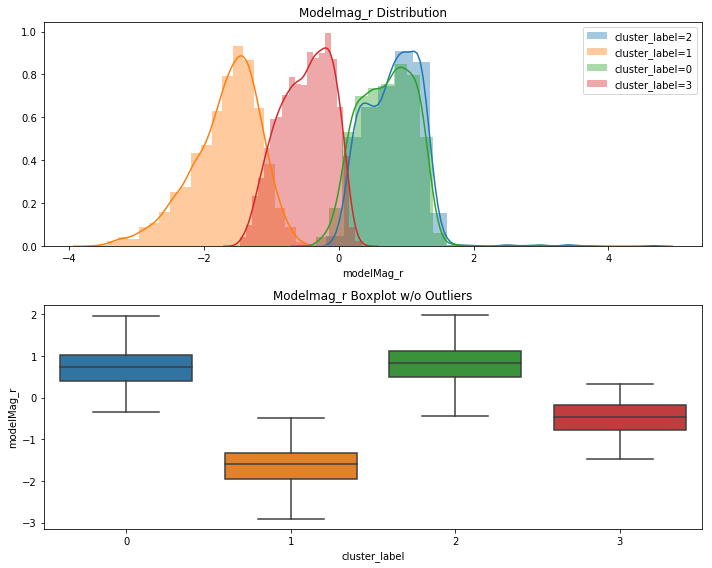

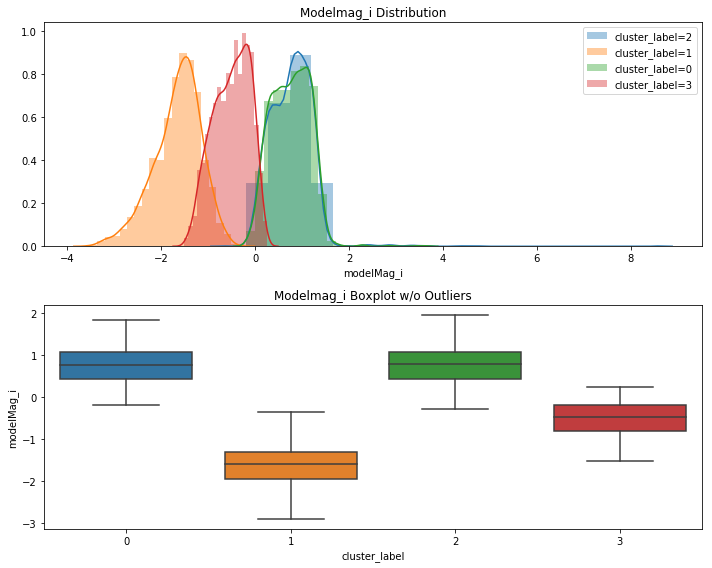

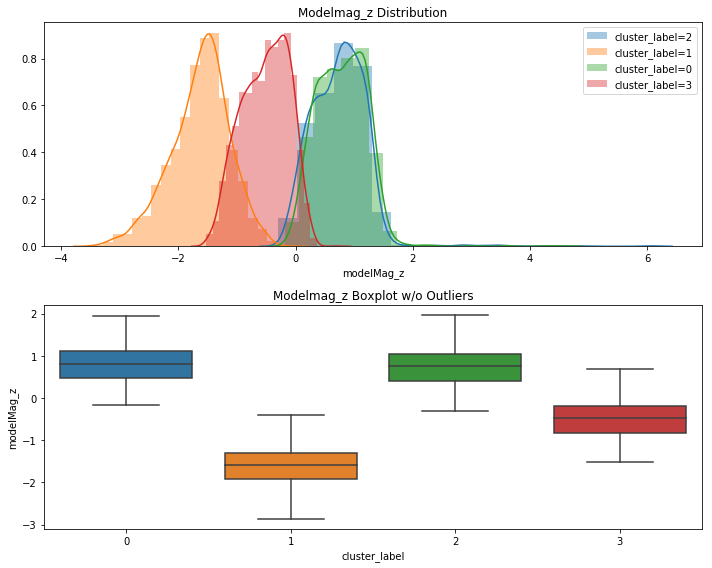

In [191]:
for mag in ['modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i','modelMag_z']:
    plt.figure()
    exploratory_plots_label(data_clus_k4, mag)

## Conclusion

Al visualizar los datos de acuerdo al label, vemos que las diferentes clases tienen diferentes comportamientos en las distribuciones de los diferentes features. 

En el caso de k=4 algunas features tienen distribuciones casi identticas para diferents valores de la etiqueta del cluster, lo que nos puede hacer pensar que k=4 sea medio grande, o que podemos probar agrupar esas etiquetas para crear un nuevo cluster.

Otras observación importante, es que estamos utilizando el **red shift** o **z** como feature de entrada a los algoritmos de cluster. Teniendo en cuenta el significado fisico de esa variable, nos parece que vale la pena realizar un analísis                      sin incluirla

# Embeddings

In [81]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


## Funciones útiles

In [148]:
def plot_2d(pca, df, colname=""):
    from mpl_toolkits.mplot3d import Axes3D 
    fig = plt.figure(figsize=(15,10))
    for idx in range(1,5):
        ax = fig.add_subplot(2,2,idx)
        im = ax.scatter(pca[:,0],pca[:,1],
               c=df[colname],cmap=plt.get_cmap("jet"),
              alpha=0.5)
        ax.set_xlabel("Axis 1")
        ax.set_ylabel("Axis 2")
        fig.colorbar(im, ax=ax)

In [137]:
def plot_3d(pca, df, colname=""):
    from mpl_toolkits.mplot3d import Axes3D 
    fig = plt.figure(figsize=(15,10))
    for idx in range(1,5):
        ax = fig.add_subplot(2,2,idx, projection='3d')
        im = ax.scatter(pca[:,0],pca[:,1],pca[:,2], 
               c=df[colname],cmap=plt.get_cmap("jet"),
              alpha=0.5)
        ax.view_init(30, 45+90*idx)
        ax.set_xlabel("Axis 1")
        ax.set_ylabel("Axis 2")
        ax.set_zlabel("Axis 3")
        fig.colorbar(im, ax=ax)


## PCA

In [156]:
pca_3dim_k3 = PCA(n_components=3)
pca_3dim_k4 = PCA(n_components=3)
pca_std_k3 = pca_3dim_k3.fit_transform(data_clus_k3)
pca_std_k4 = pca_3dim_k4.fit_transform(data_clus_k4)

In [158]:
print(pca_3dim_k3.explained_variance_ratio_, sum(pca_3dim_k3.explained_variance_ratio_))
print(pca_3dim_k4.explained_variance_ratio_, sum(pca_3dim_k4.explained_variance_ratio_))

[0.67928992 0.15365282 0.08613483] 0.9190775692927168
[0.58804097 0.21775582 0.08591868] 0.8917154572875315


In [168]:
axis_components_k3 = pd.DataFrame(index=data_clus_k3.columns, columns=["Ax1", "Ax2", "Ax3"], 
                                  data=pca_3dim_k3.components_.T)
axis_components_k4 = pd.DataFrame(index=data_clus_k4.columns, columns=["Ax1", "Ax2", "Ax3"], 
                                  data=pca_3dim_k4.components_.T)

In [169]:
axis_components_k3

,Ax1,Ax2,Ax3
modelMag_u,0.365809,0.272530,0.371260
modelMag_g,0.404577,0.047698,0.149355
modelMag_r,0.409641,-0.069388,0.031972
modelMag_i,0.406689,-0.117664,0.004207
modelMag_z,0.402620,-0.153865,-0.015353
petroR90_r,-0.301468,-0.177900,0.023731
z,0.080172,0.665906,-0.691381
Color,0.194283,-0.624807,-0.591271
cluster_label,0.268588,0.125118,-0.102032


In [170]:
axis_components_k4

,Ax1,Ax2,Ax3
modelMag_u,0.370347,-0.200499,0.431972
modelMag_g,0.415443,-0.072673,0.141414
modelMag_r,0.423433,-0.000960,-0.007350
modelMag_i,0.421805,0.030982,-0.050925
modelMag_z,0.418695,0.056350,-0.080668
petroR90_r,-0.304646,0.217735,0.053572
z,0.056061,-0.529648,-0.278866
Color,0.214588,0.352817,-0.779488
cluster_label,-0.125419,-0.705668,-0.309855


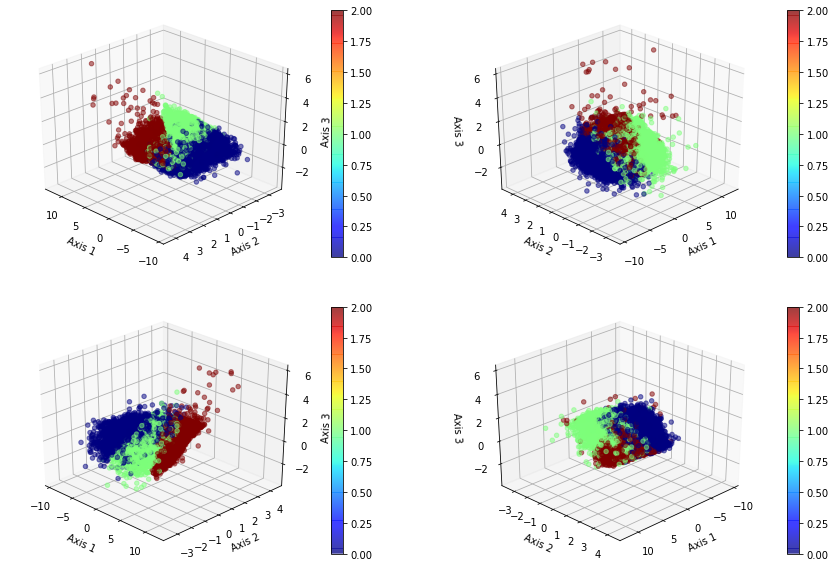

In [139]:
plot_3d(pca_std_k3, data_clus_k3, "cluster_label")

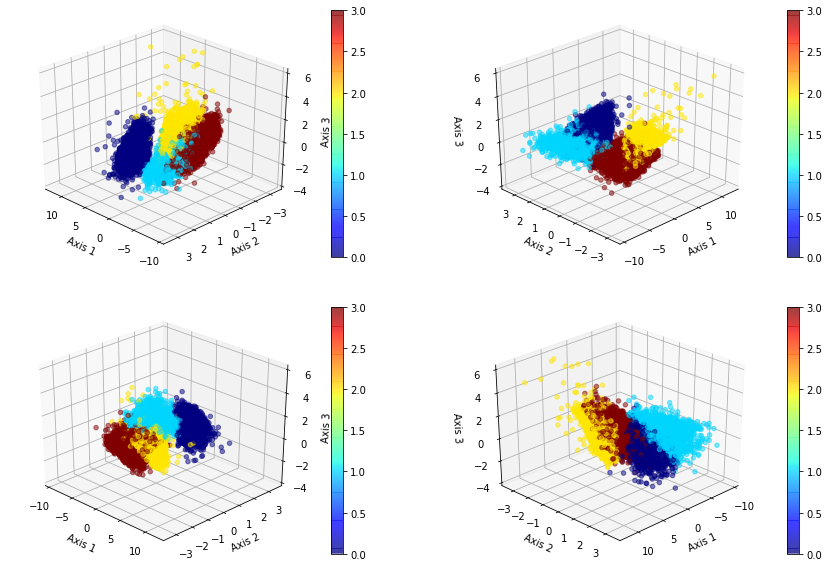

In [140]:
plot_3d(pca_std_k4, data_clus_k4, "cluster_label")

## TSNE

In [151]:
tsne_3dim = TSNE(n_components=3, )
tsne_std_k3 = tsne_3dim.fit_transform(data_clus_k3)
tsne_std_k4 = tsne_3dim.fit_transform(data_clus_k4)

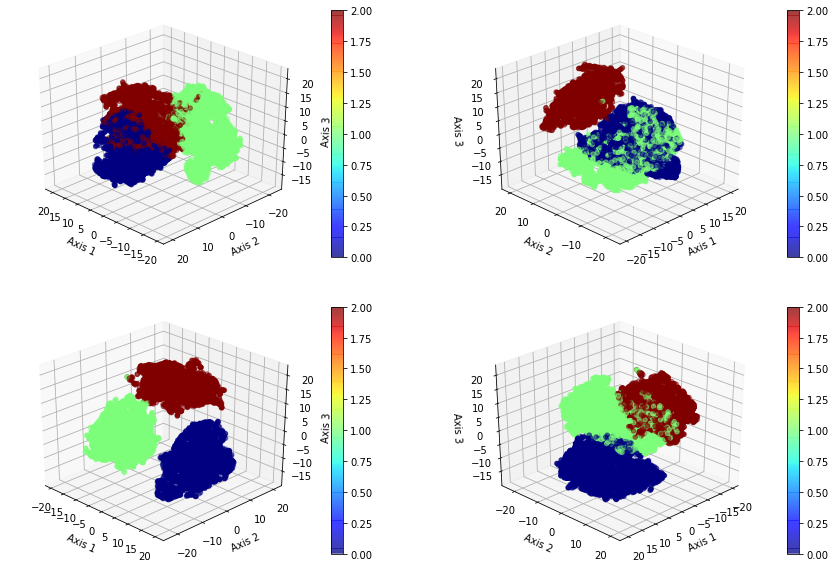

In [152]:
plot_3d(tsne_std_k3, data_clus_k3, "cluster_label")

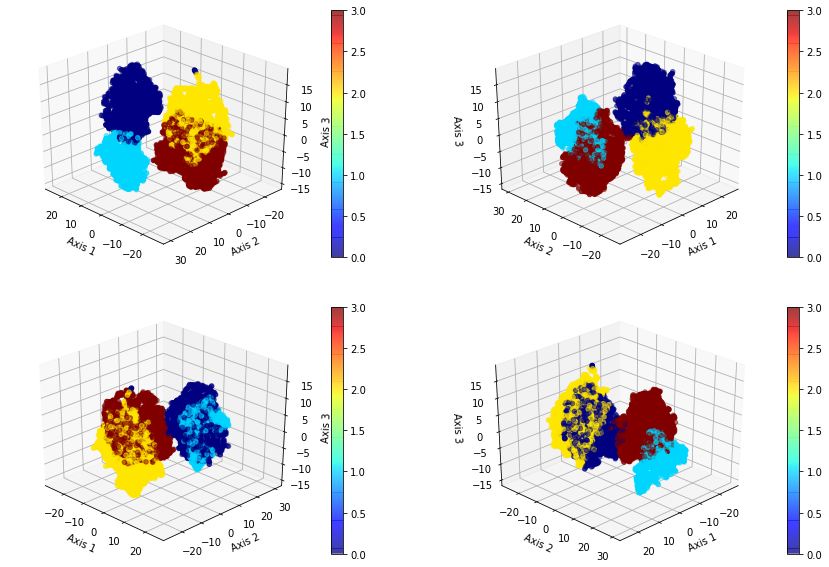

In [161]:
plot_3d(tsne_std_k4, data_clus_k4, "cluster_label")

## Correlación

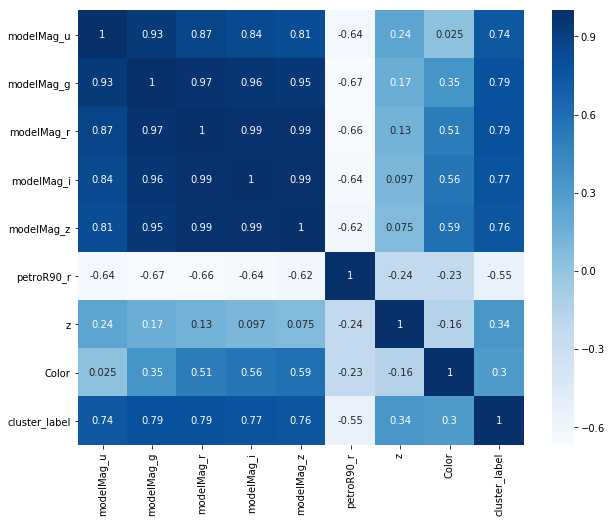

In [172]:
sns.heatmap(data_clus_k3.corr(), annot=True, cmap="Blues")

Vemos que los colores estan altamente correlacionados entre ellos, siendo **modelMag_g** el que parece tener más correlación con el resto. Ademas tiene buena correlacion con el label asignado por el cluster, por lo tanto esta es una de las features que vamos a utilziar para graficar.

Luego, las otras 2 columnas que vamos a utilizar son **petroR90_r** y **z**, ya uqe color sigue teniendo cierta correlacion con modelMag_g



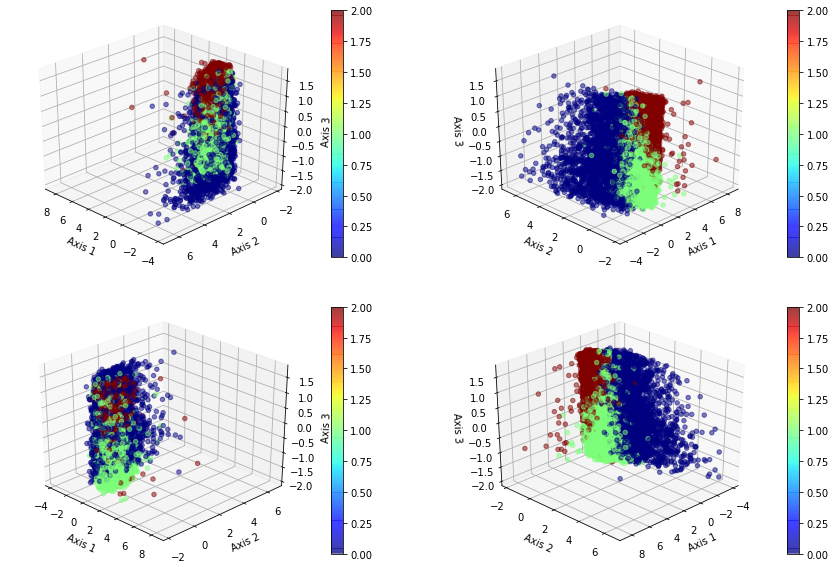

In [176]:
plot_3d(data_clus_k3[["modelMag_g", "petroR90_r", "z"]].values,
        data_clus_k3, "cluster_label")

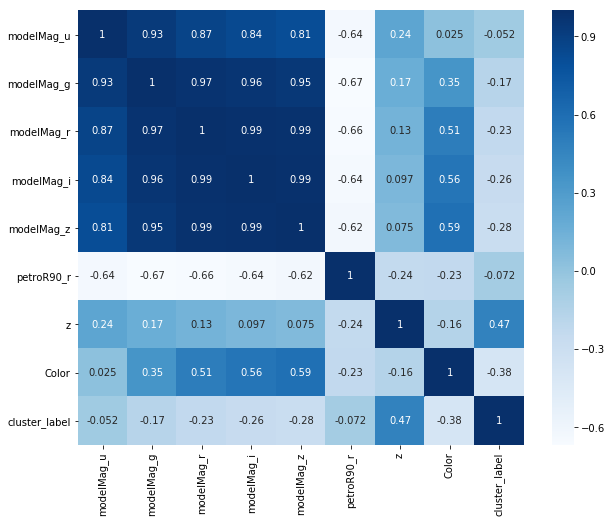

In [173]:
sns.heatmap(data_clus_k4.corr(), annot=True, cmap="Blues")

En este caso nos quedamos con las variables:
  * modelMag_g
  * z
  * Color
 

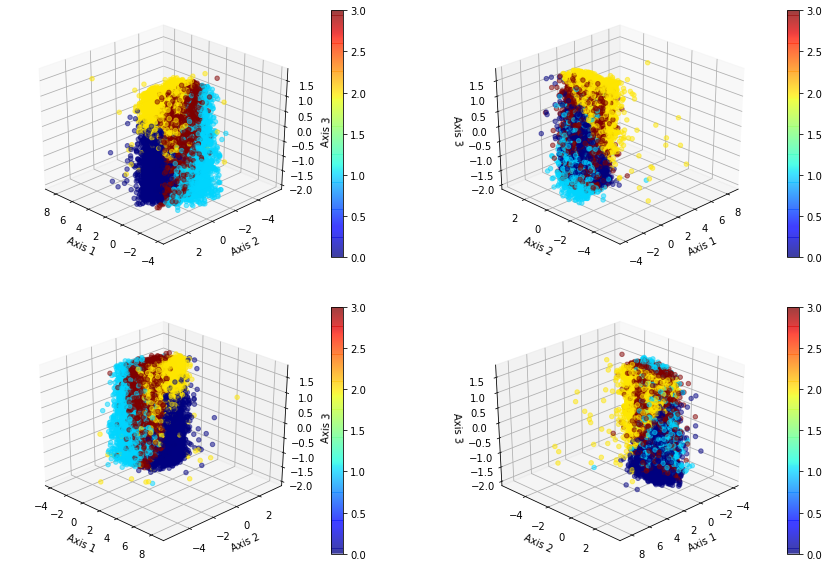

In [177]:
plot_3d(data_clus_k4[["modelMag_g", "Color", "z"]].values,
        data_clus_k4, "cluster_label")